# SPARKLING-TIME SERIES FORECAST

In [141]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import month_plot



## 1. Read the data as an appropriate Time Series data and plot the data. 

In [143]:
df1 = pd.read_csv('Sparkling.csv')
df = pd.read_csv('Sparkling.csv')

In [144]:
df1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [145]:
df1.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [146]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


### Converting column to datetime and making it as index 

In [147]:
date = pd.date_range(start='1/1/1980', periods=len(df), freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [148]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [149]:
df.set_index('Time_Stamp',inplace=True)
df.drop('YearMonth', axis = 1, inplace =True)

In [150]:
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [151]:
df.tail()

Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [153]:
df.shape

(187, 1)

In [154]:
df.isnull().sum()

Sparkling    0
dtype: int64

In [155]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Setting figure size

In [156]:
from pylab import rcParams
rcParams['figure.figsize'] = 22,9

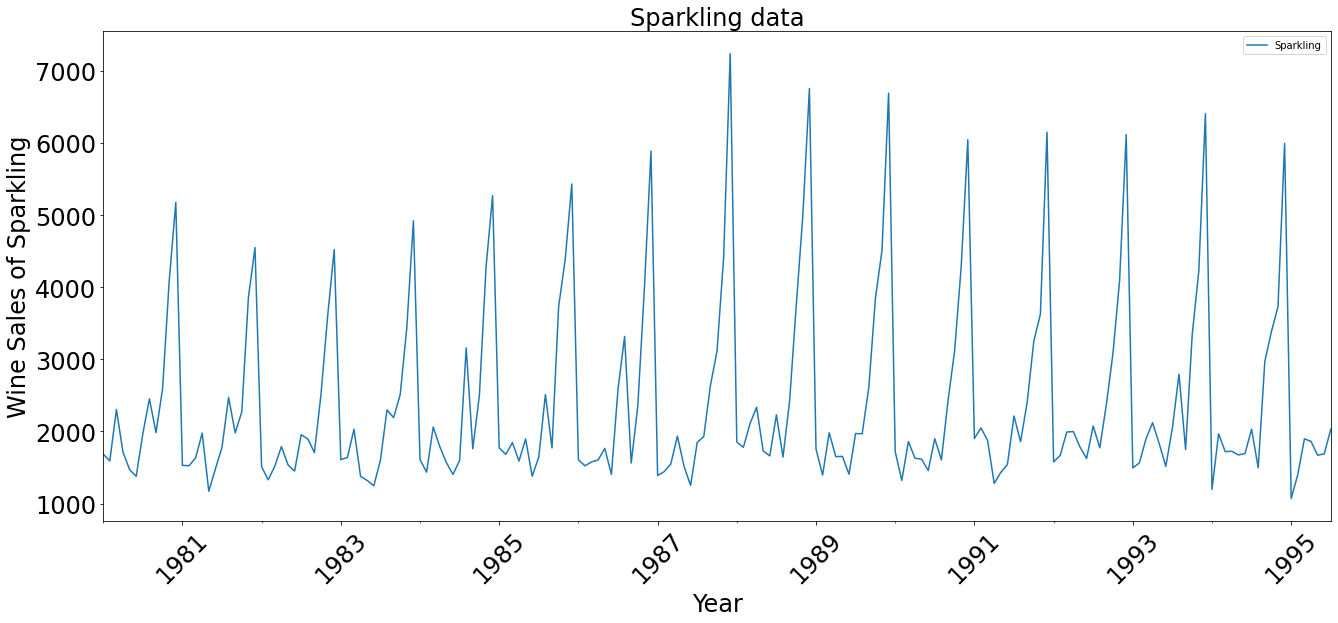

In [157]:
#Plot the time series
df.plot()

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.title("Sparkling data",fontsize=24)
plt.xlabel('Year',fontsize=24)
plt.ylabel('Wine Sales of Sparkling',fontsize=24, rotation = 90)

plt.show()

In [158]:
#Let's try to do log transformation
df_log = df.copy()
df_log['Sparkling'] = np.log(df)


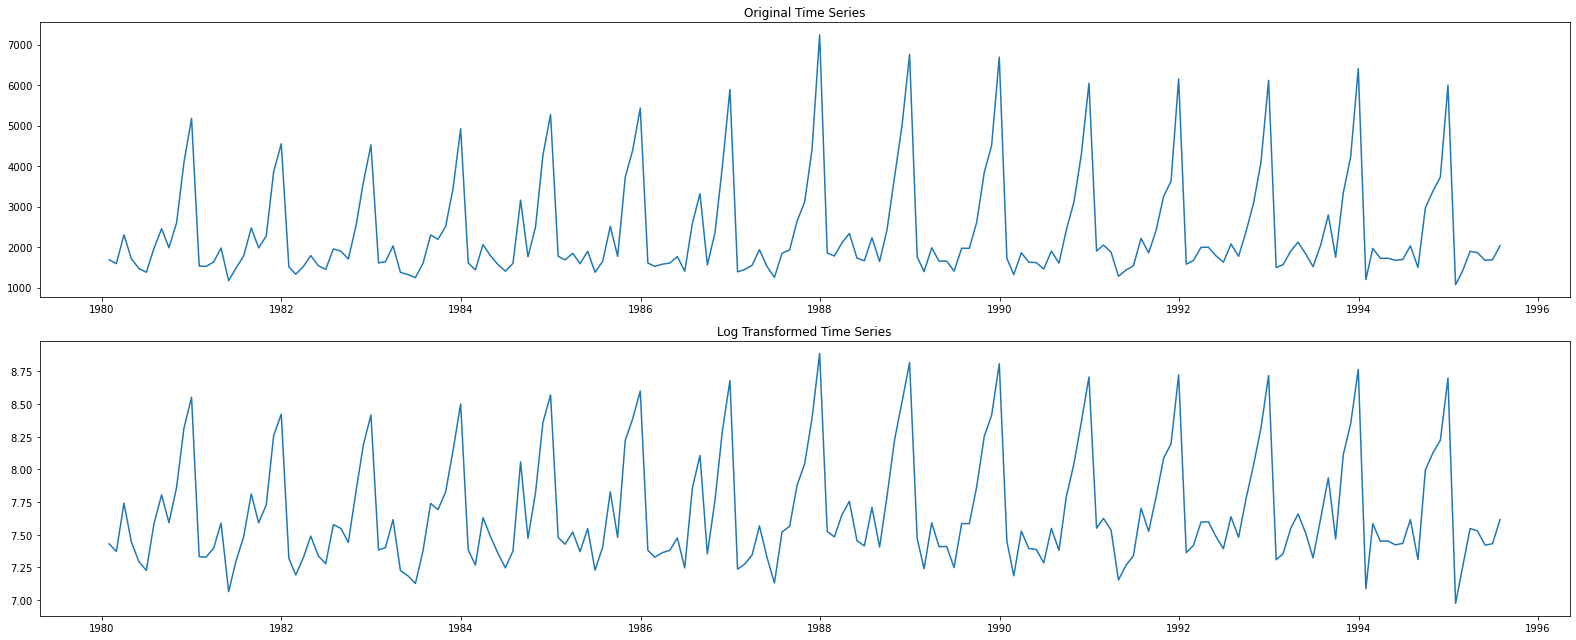

In [159]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df_log)
plt.tight_layout()

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

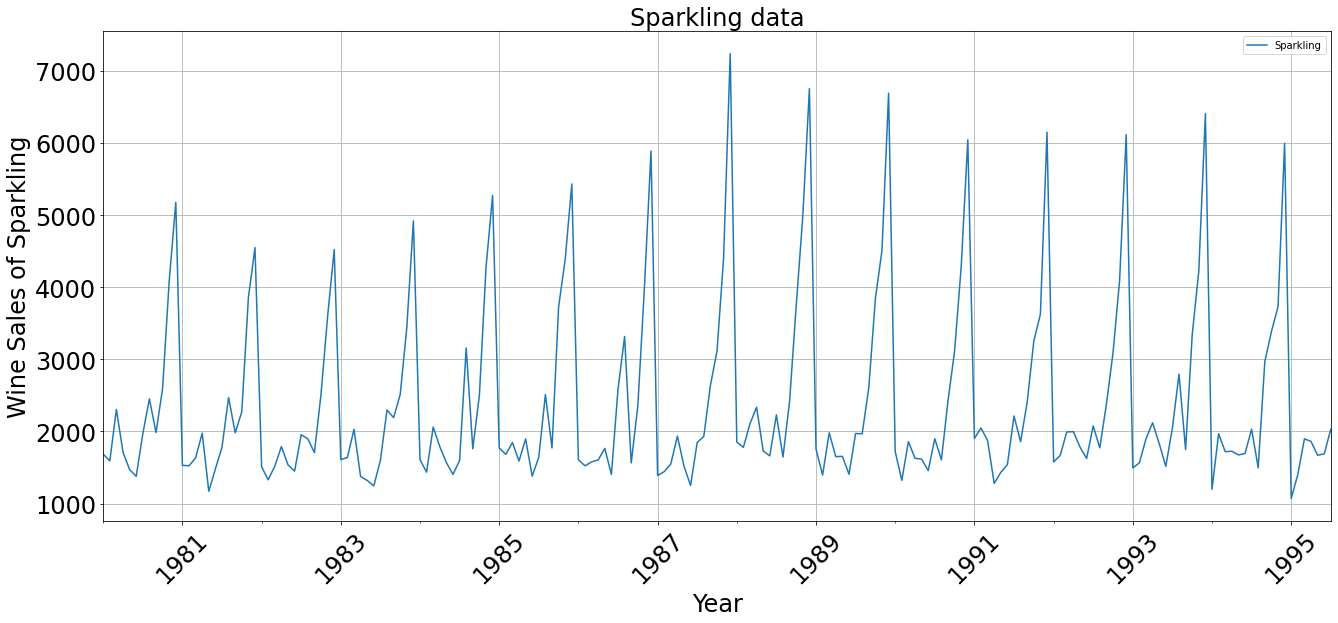

In [160]:
df.plot();
plt.legend(loc='best')
plt.title("Sparkling data",fontsize=24)

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.xlabel('Year',fontsize=24)
plt.ylabel('Wine Sales of Sparkling',fontsize=24, rotation = 90)
plt.grid()

In [161]:
round(df.describe(),2)

Sparkling
count     187.00
mean     2402.42
std      1295.11
min      1070.00
25%      1605.00
50%      1874.00
75%      2549.00
max      7242.00

### Monthly EDA 

No handles with labels found to put in legend.


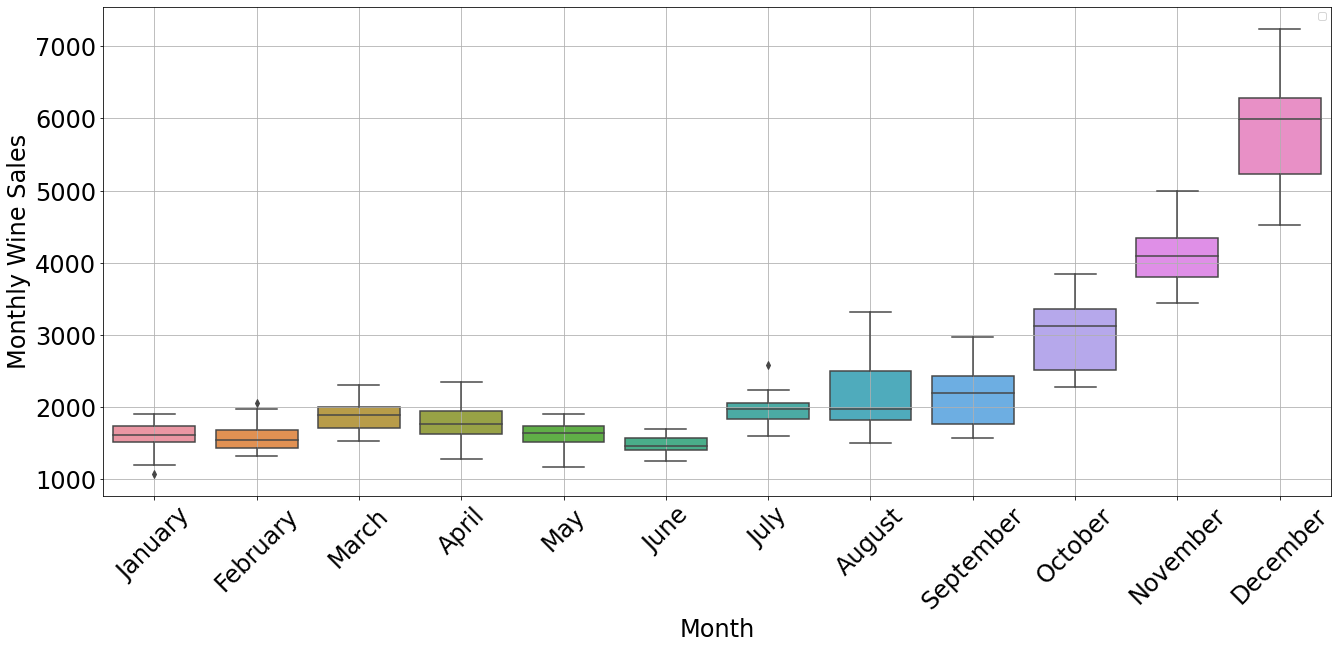

In [162]:
fig, ax = plt.subplots(figsize=(22,9))
sns.boxplot(df.index.month_name(), df.Sparkling, ax=ax,whis=1.5)

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.xlabel('Month',fontsize=24);
plt.ylabel('Monthly Wine Sales',fontsize=24);




plt.legend(loc='best')
plt.grid();



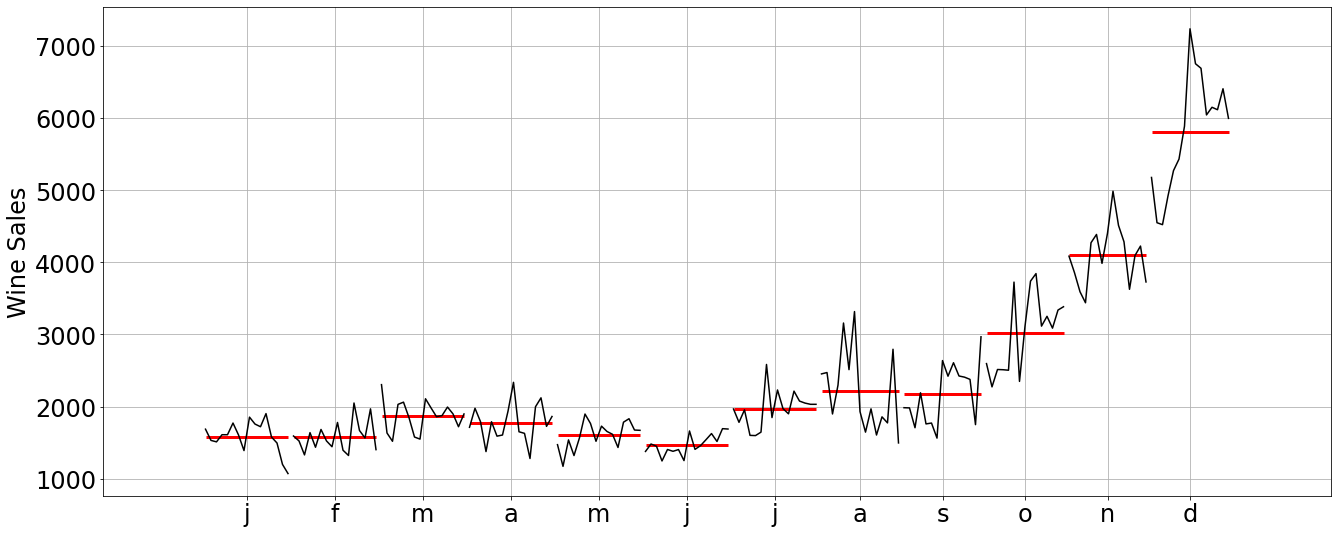

In [163]:
fig, ax = plt.subplots(figsize=(22,9))

month_plot(df,ylabel='Wine Sales',ax=ax)
plt.ylabel('Wine Sales',fontsize=24);
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
plt.grid();

### Yearly EDA 

In [164]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October','November', 'December']

yearly_sales_across_months = pd.pivot_table(df, values = 'Sparkling',
                                            columns = df.index.month, 
                                            index = df.index.year)

yearly_sales_across_months.columns = months
yearly_sales_across_months

January  February   March   April     May    June    July  August  \
Time_Stamp                                                                      
1980         1686.0    1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981         1530.0    1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982         1510.0    1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983         1609.0    1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984         1609.0    1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985         1771.0    1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986         1606.0    1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987         1389.0    1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988         1853.0    1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989         1757.0    1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990         1720.0    1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991         1902.0    2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992         1577.0    1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993         1494.0    1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994         1197.0    1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995         1070.0    1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

            September  October  November  December  
Time_Stamp                                          
1980           1984.0   2596.0    4087.0    5179.0  
1981           1981.0   2273.0    3857.0    4551.0  
1982           1706.0   2514.0    3593.0    4524.0  
1983           2191.0   2511.0    3440.0    4923.0  
1984           1759.0   2504.0    4273.0    5274.0  
1985           1771.0   3727.0    4388.0    5434.0  
1986           1562.0   2349.0    3987.0    5891.0  
1987           2638.0   3114.0    4405.0    7242.0  
1988           2421.0   3740.0    4988.0    6757.0  
1989           2608.0   3845.0    4514.0    6694.0  
1990           2424.0   3116.0    4286.0    6047.0  
1991           2408.0   3252.0    3627.0    6153.0  
1992           2377.0   3088.0    4096.0    6119.0  
1993           1749.0   3339.0    4227.0    6410.0  
1994           2968.0   3385.0    3729.0    5999.0  
1995              NaN      NaN       NaN       NaN

#### Yearly variation 

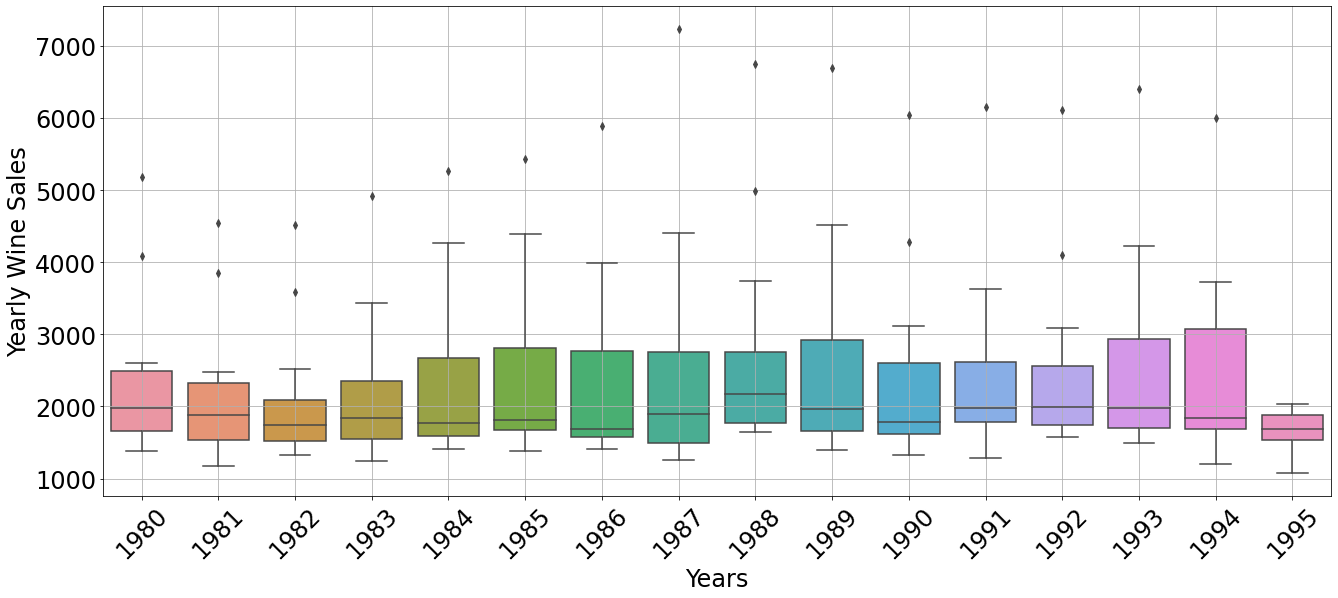

In [165]:
fig, ax = plt.subplots(figsize=(22,9))
sns.boxplot(df.index.year, df.Sparkling, ax=ax,whis=1.5)


plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.xlabel('Years',fontsize=24);
plt.ylabel('Yearly Wine Sales',fontsize=24);

plt.grid();

#### Monthly variation across all years 

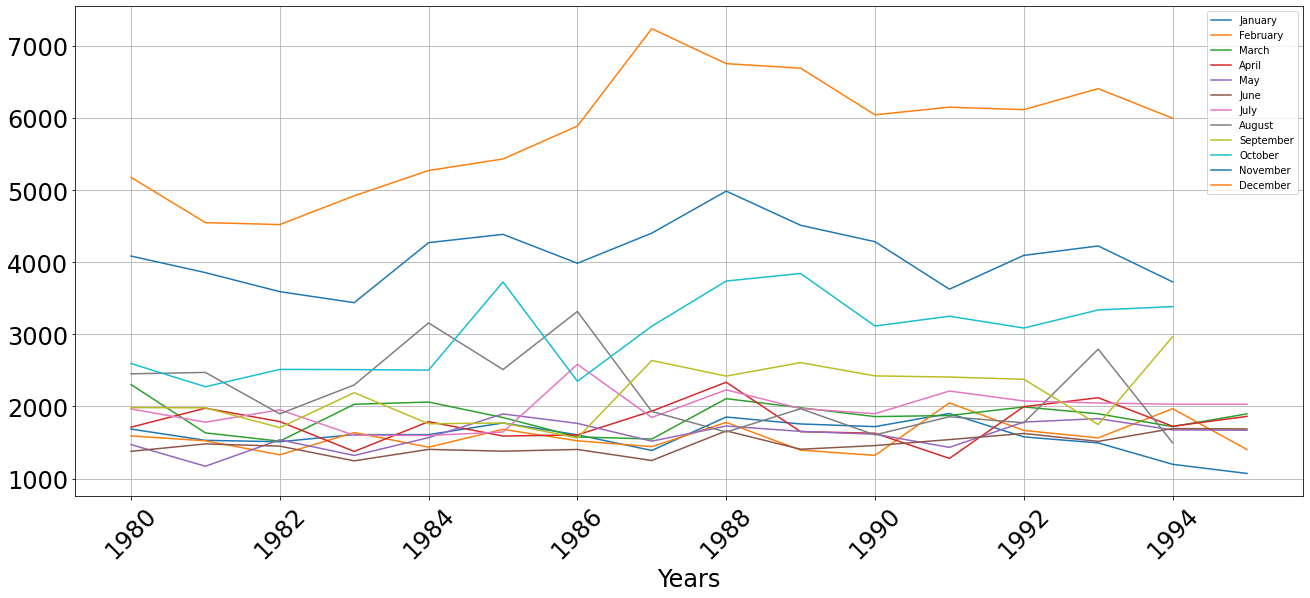

In [166]:
fig, ax = plt.subplots(figsize=(22,9))
yearly_sales_across_months.plot(ax=ax)


plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.xlabel('Years',fontsize=24);
plt.grid();

#### Yearly Wine sales 

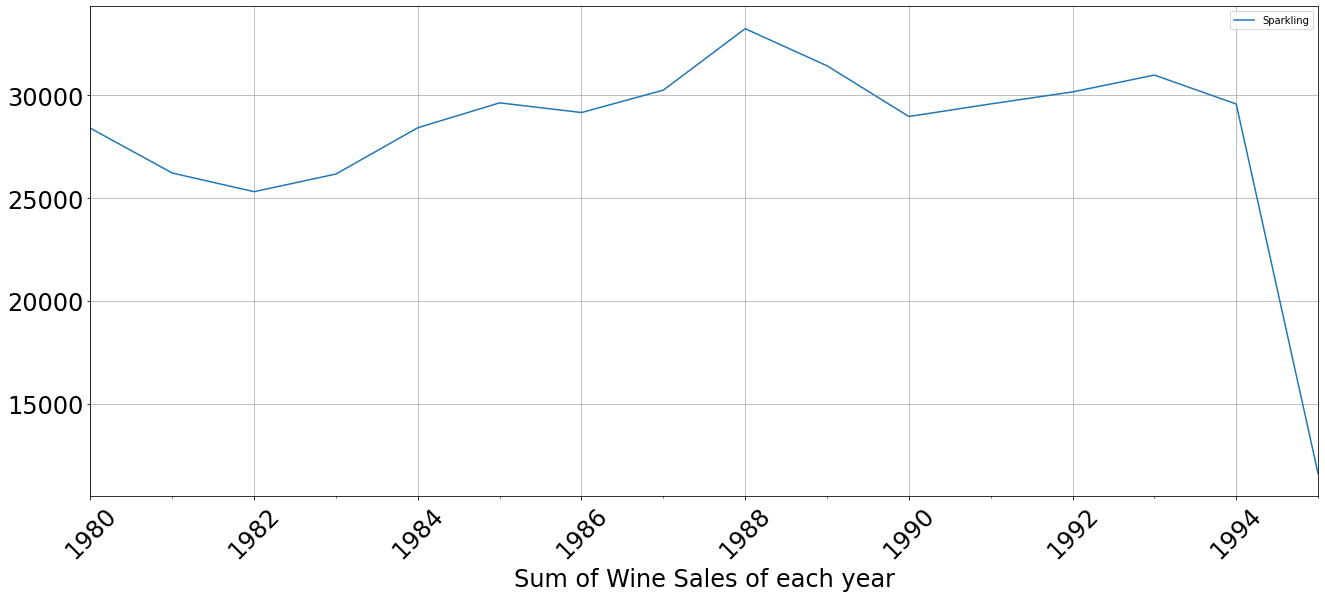

In [167]:
df_yearly_sum = df.resample('Y').sum()
df_yearly_sum.plot();

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.grid()

plt.xlabel('Sum of Wine Sales of each year',fontsize=24);

### Empirical Cumulative Distribution 

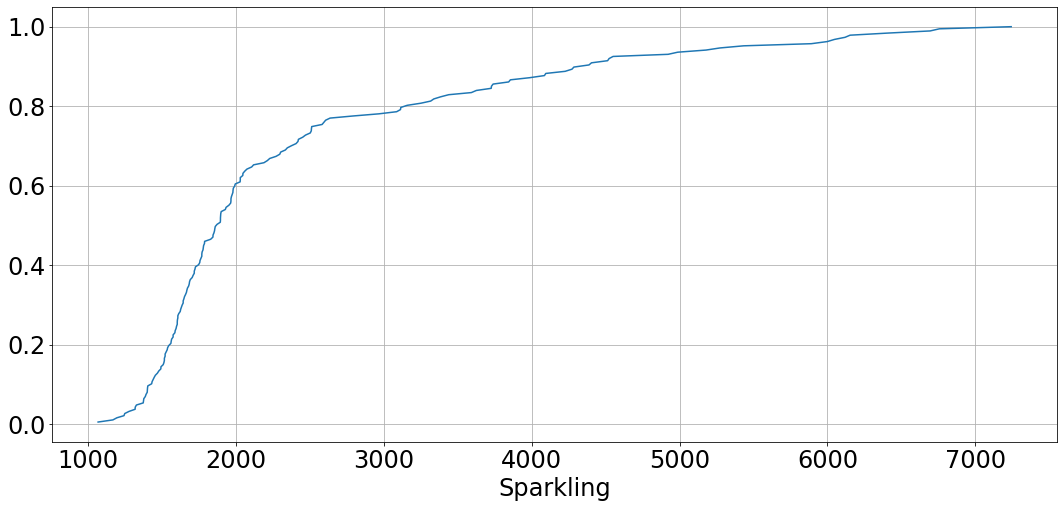

In [168]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");

plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)

plt.grid()
plt.xlabel('Sparkling',fontsize=24);

### Average Wine Sales per month and the month on month percentage change of WineSales. 

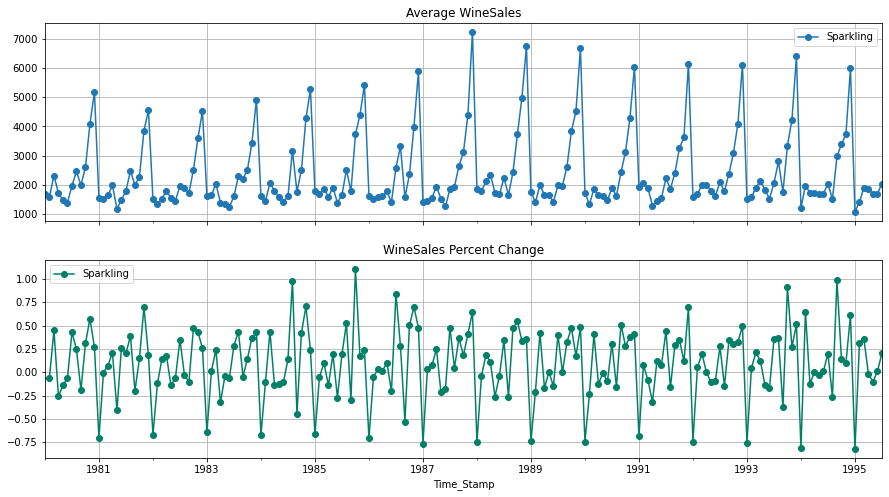

In [169]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()


fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average WineSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="WineSales Percent Change",grid=True)


### Additive Decomposition 

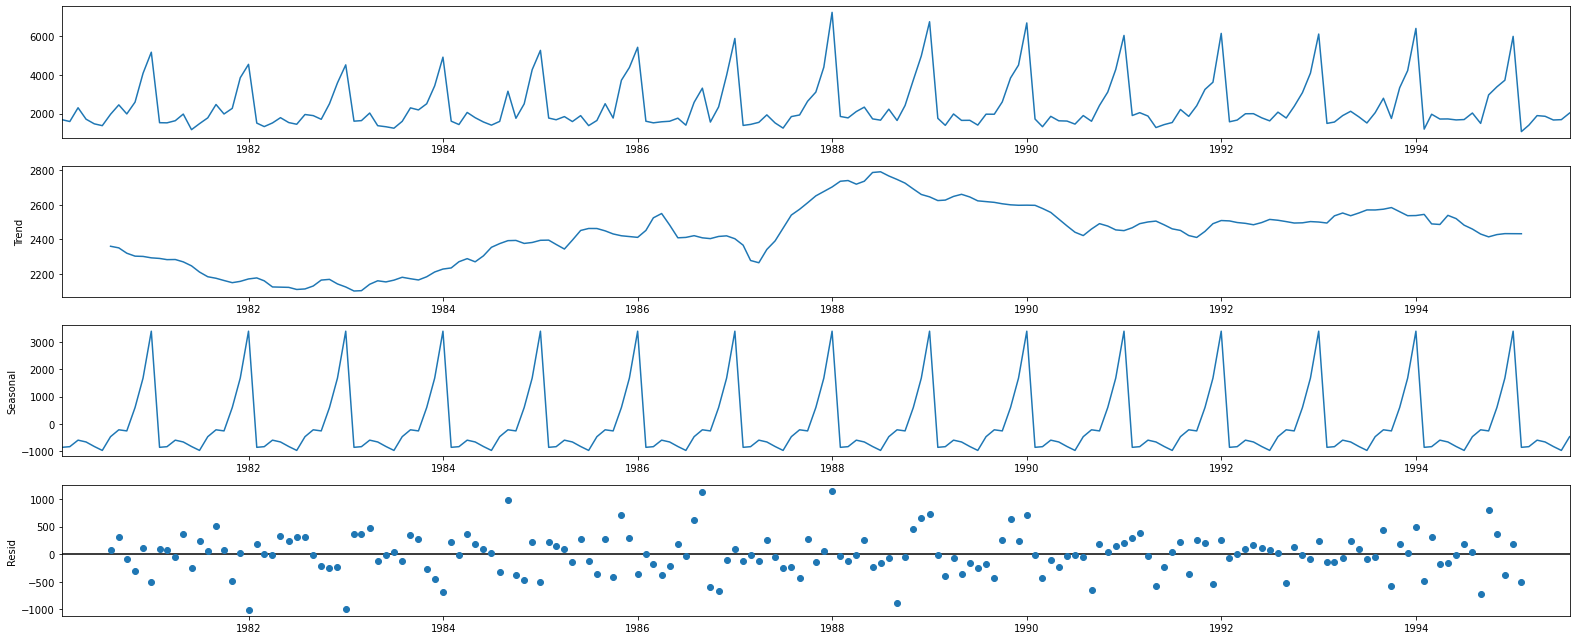

In [170]:
#Decompose the time series additively
df1_add_decompose = seasonal_decompose(df, model = 'additive', period = 12)
df1_add_decompose.plot()

plt.show()

In [171]:
trend = df1_add_decompose.trend
seasonality = df1_add_decompose.seasonal
residual = df1_add_decompose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

### Multiplicative Decomposition 

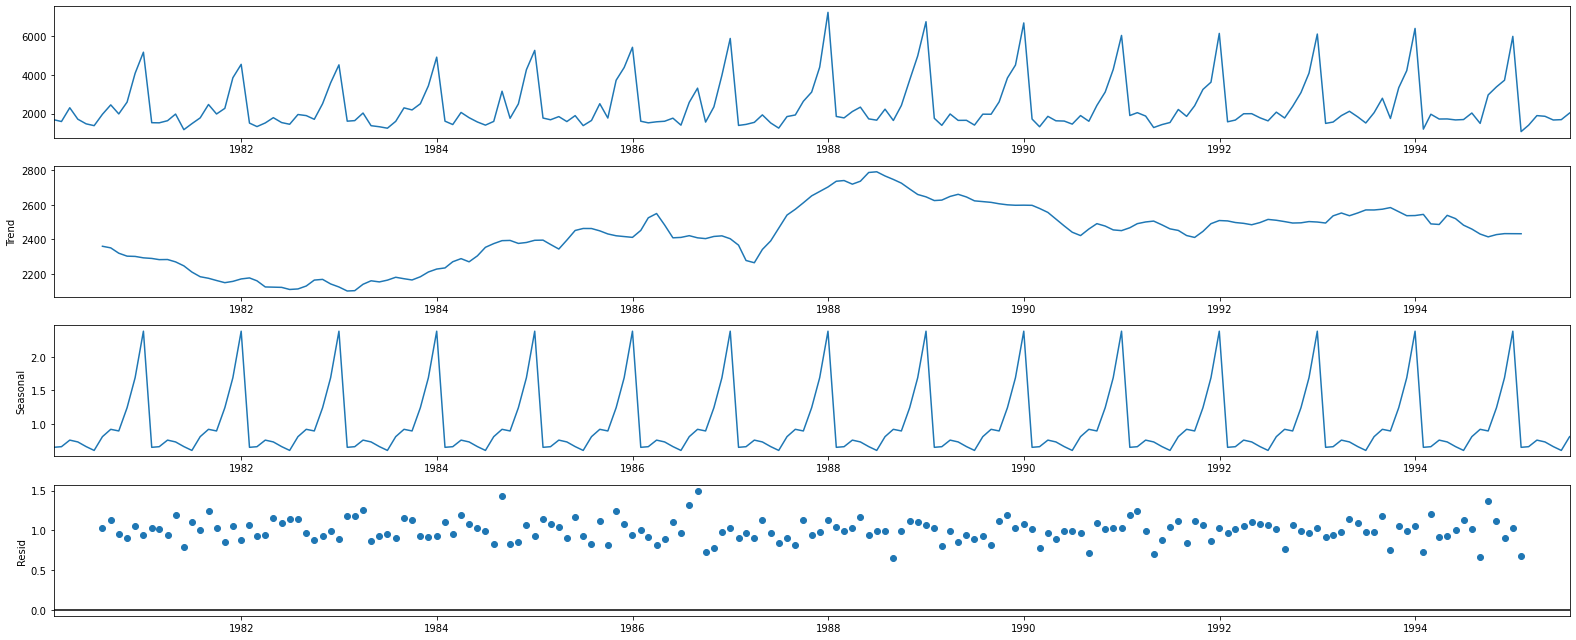

In [172]:
##Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

In [173]:
trend = df1_mul_decompose.trend
seasonality = df1_mul_decompose.seasonal
residual = df1_mul_decompose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

## 3. Split the data into training and test. The test data should start in 1991.

In [174]:
from   IPython.display                 import display

In [175]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [176]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [177]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

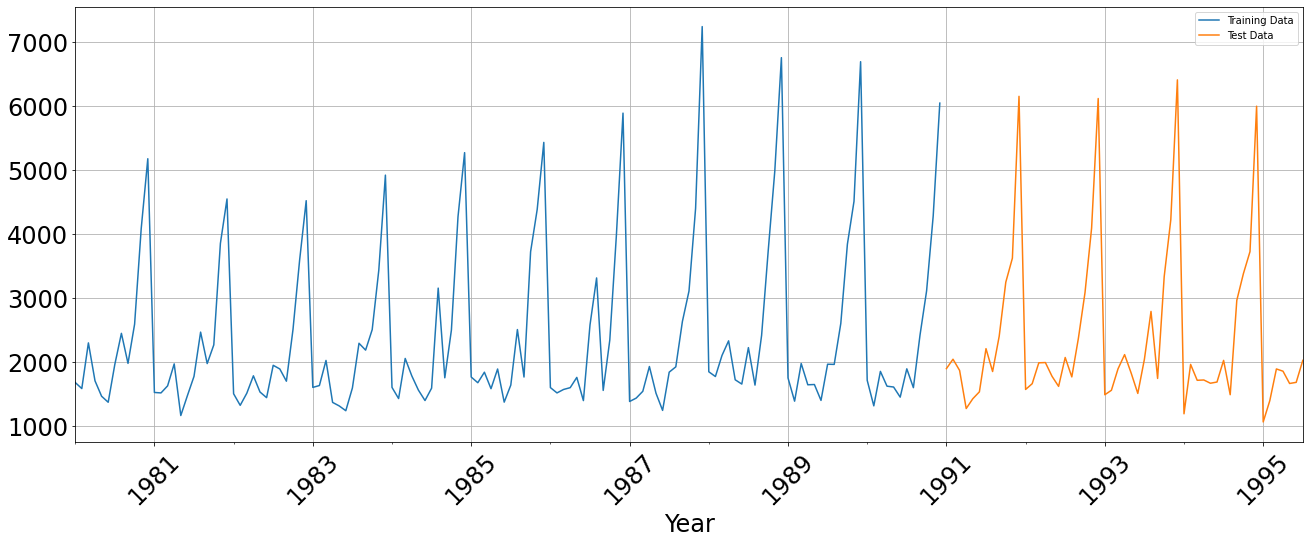

In [178]:
train['Sparkling'].plot(figsize=(22,8), fontsize=14)
test['Sparkling'].plot(figsize=(22,8), fontsize=14)

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.grid()
plt.legend(['Training Data','Test Data'])
plt.xlabel('Year',fontsize=24)
plt.show()

## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [179]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [180]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



### Model 1: Linear Regression

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [182]:
lr = LinearRegression()

lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

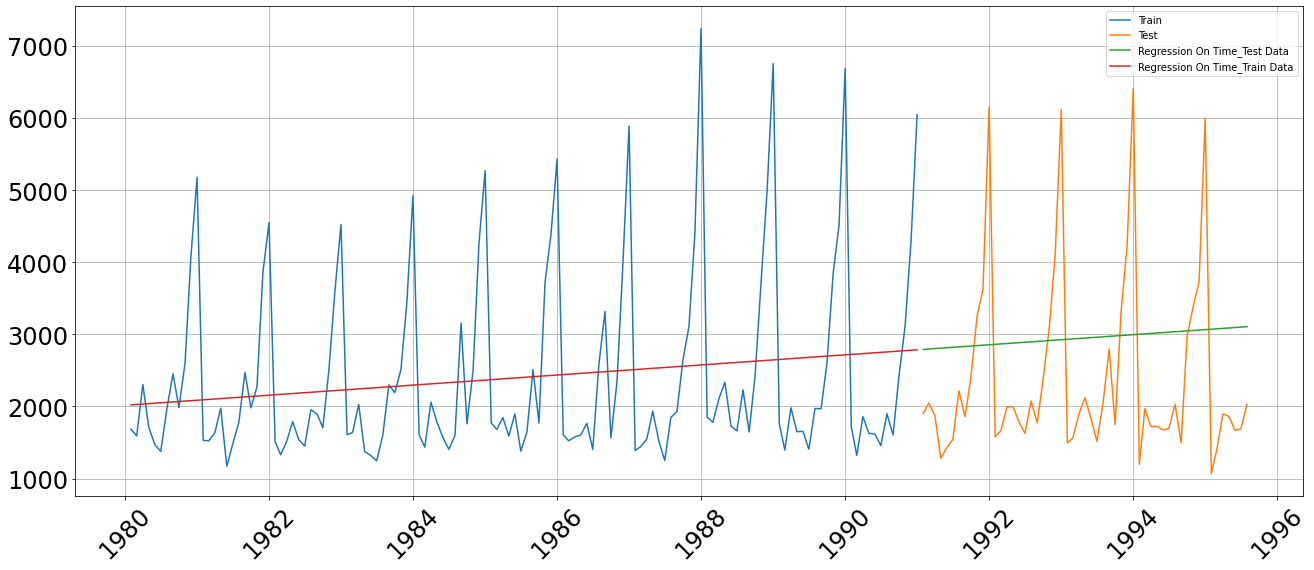

In [183]:
train_predictions_model1              = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime']   = train_predictions_model1

test_predictions_model1              = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime']   = test_predictions_model1


plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

Model Evaluation by RMSE

In [184]:
## Train Data - RMSE
rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model1_train))

## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Train Data,  RMSE is 1279.322
For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [185]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1389.135175

## Model 2: Naive Approach

In [186]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [187]:
NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

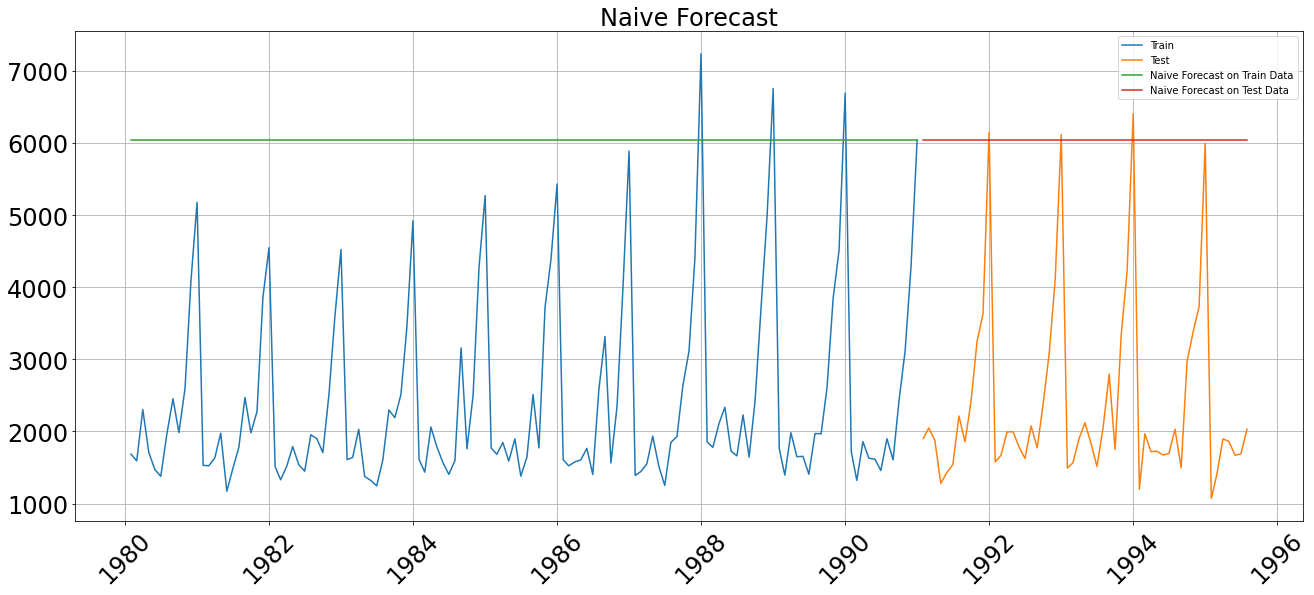

In [188]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Train Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.title("Naive Forecast",fontsize=24)
plt.grid();

Model Evaluation by RMSE

In [189]:
## Train Data - RMSE

rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model2_train))

## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Train Data,  RMSE is 3867.701
For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [190]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

## Model 3: Simple Average

In [191]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [192]:
SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

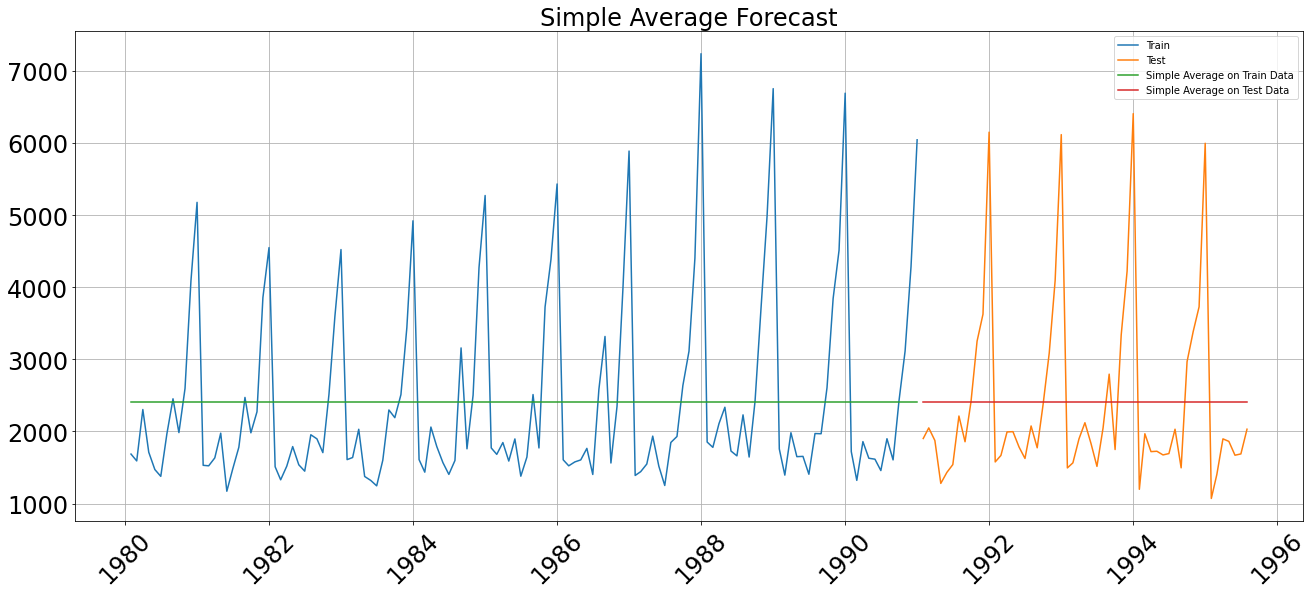

In [193]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Train Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.title("Simple Average Forecast",fontsize=24)
plt.grid();

Model Evaluation by RMSE

In [194]:
## Train Data - RMSE 
rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
print("For Simple Average forecast on the Train Data,  RMSE is %3.3f" %(rmse_model3_train))

## Test Data - RMSE 
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Train Data,  RMSE is 1298.484
For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [195]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

## Model 4: Moving Average(MA)

In [196]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [197]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

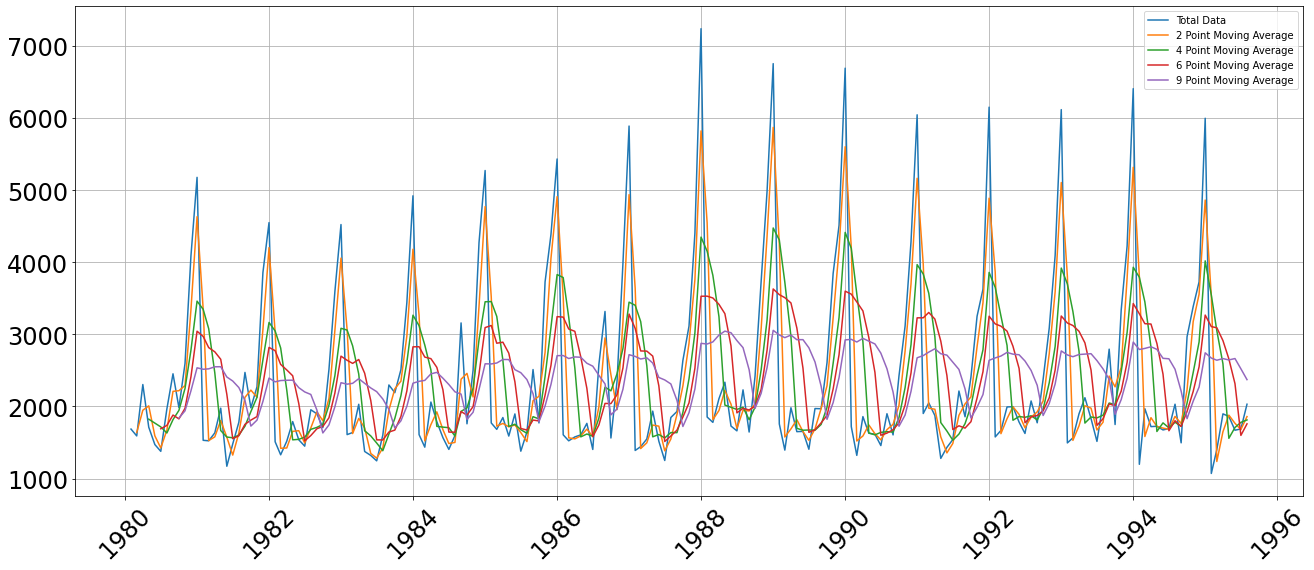

In [198]:
plt.plot(MovingAverage['Sparkling'], label='Total Data')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc = 'best')
plt.grid();

In [199]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

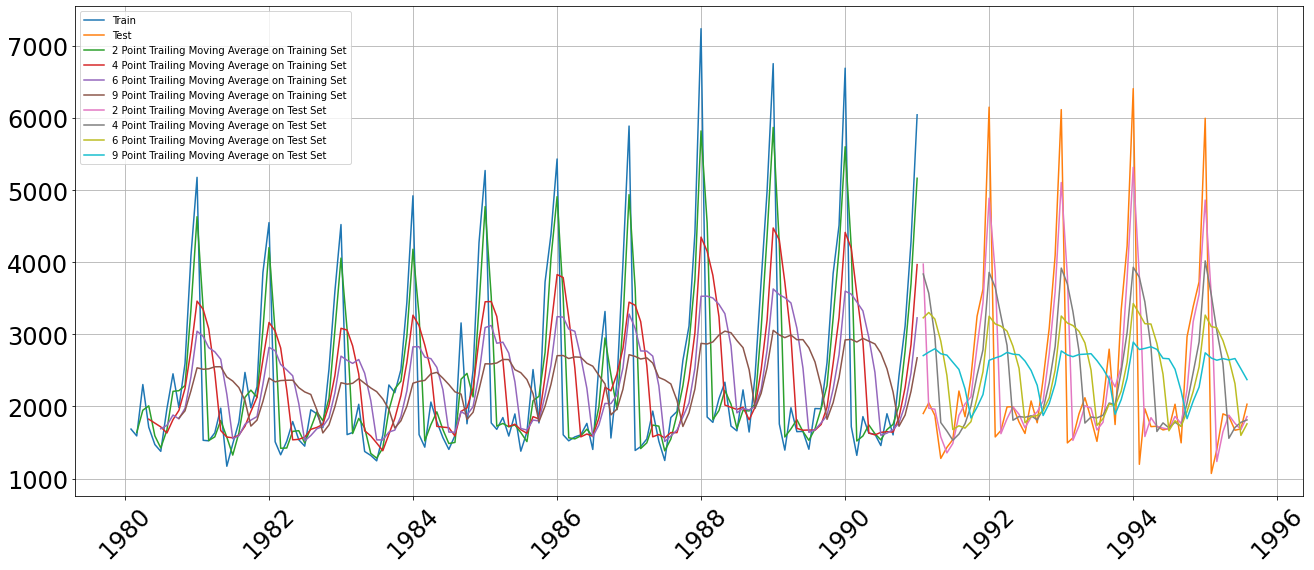

In [200]:
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc = 'best')
plt.grid();

Model Evaluation by RMSE

In [201]:
## Train Data - RMSE --> 2 point Trailing MA

rmse_model4_train_2 = metrics.mean_squared_error(train.iloc[1:],trailing_MovingAverage_train['Trailing_2'].dropna(),squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_train_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_train_4 = metrics.mean_squared_error(train.iloc[3:],trailing_MovingAverage_train['Trailing_4'].dropna(),squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_train_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_train_6 = metrics.mean_squared_error(train.iloc[5:],trailing_MovingAverage_train['Trailing_6'].dropna(),squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_train_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_train_9 = metrics.mean_squared_error(train.iloc[8:],trailing_MovingAverage_train['Trailing_9'].dropna(),squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_train_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 689.157
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1106.403
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1261.788
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1372.843 


In [202]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1346.278 


In [203]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

### Model 1 to Model 4 Plots

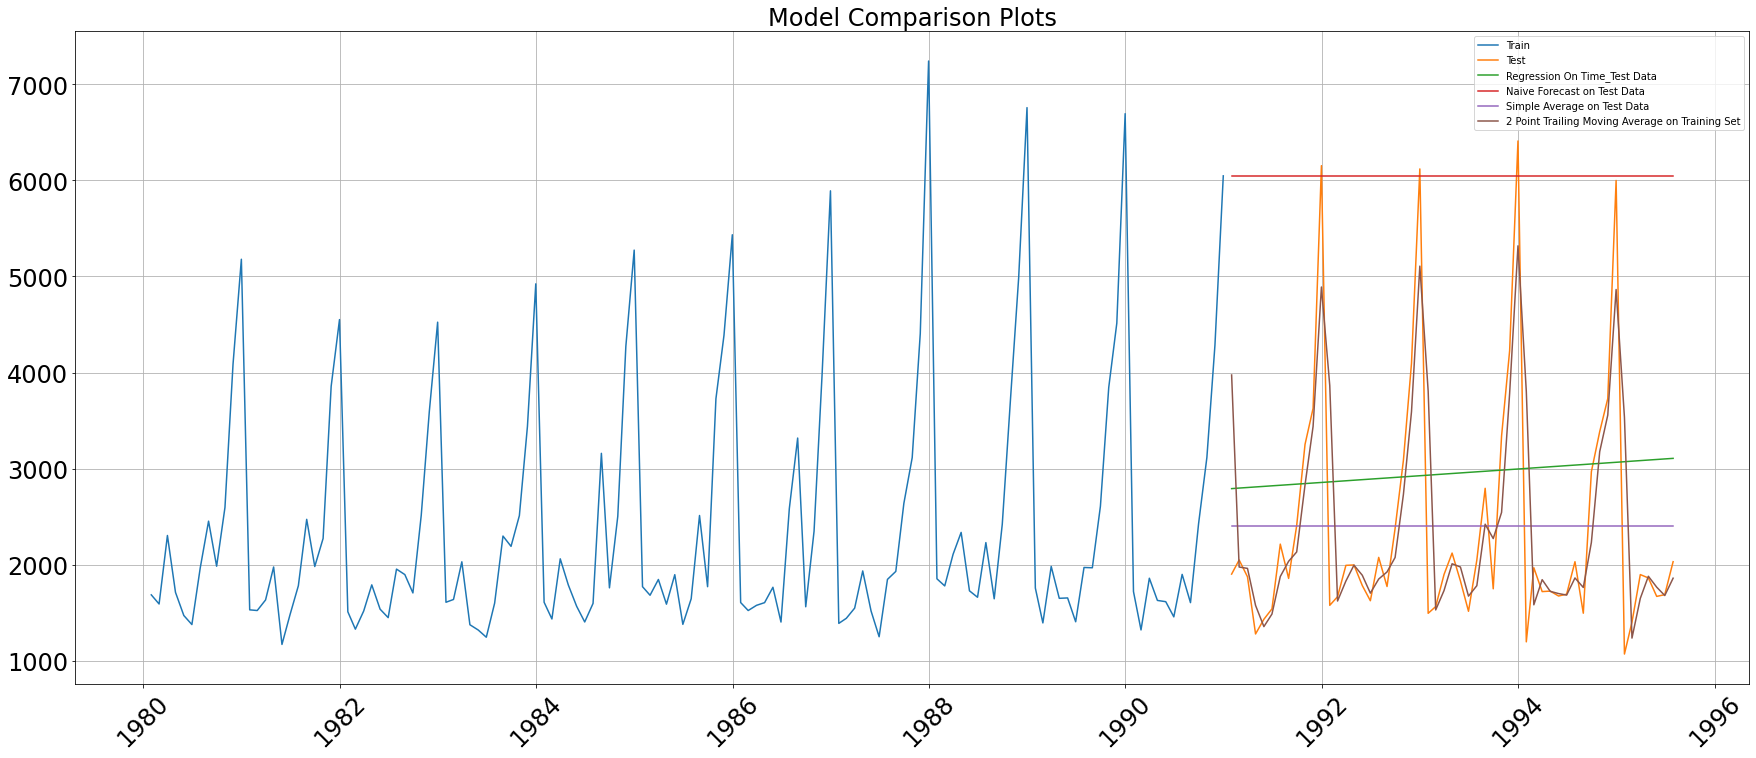

In [204]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.title("Model Comparison Plots",fontsize=24)
plt.grid();

### Model 5: Simple Exponential Smoothing

#### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

In [205]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

import warnings
warnings.filterwarnings('ignore')

#### StatsModel Method 

In [206]:
SES_train = train.copy()
SES_test = test.copy()
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [207]:
model_SES_autofit = model_SES.fit(optimized=True)

In [208]:
model_SES_autofit.params

{'smoothing_level': 0.04960736049406556,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2151.614314422547,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [209]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2725.336037
1991-02-28       2049  2725.336037
1991-03-31       1874  2725.336037
1991-04-30       1279  2725.336037
1991-05-31       1432  2725.336037

In [210]:
SES_train.head()

Sparkling      predict
Time_Stamp                        
1980-01-31       1686  2151.614314
1980-02-29       1591  2128.516417
1980-03-31       2304  2101.851647
1980-04-30       1712  2111.879693
1980-05-31       1471  2092.042717

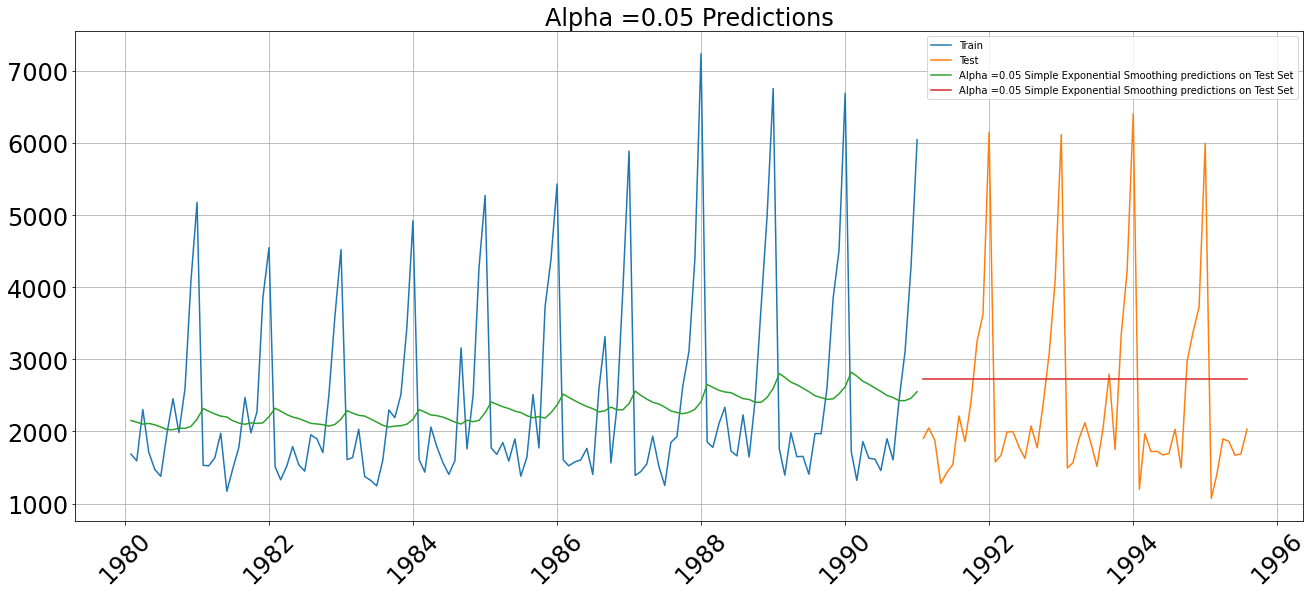

In [211]:
## Plotting on both the Training and Test data


plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.05 Predictions',fontsize=24);

Model Evaluation for  𝛼  = 0.05 : Simple Exponential Smoothing

In [212]:
## Train Data

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict'],squared=False)
print("For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Train Data, RMSE is %3.3f" %(rmse_model5_train_1))

## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Train Data, RMSE is 1312.004
For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.135


In [213]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.05,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                       1389.135175
NaiveModel                             3864.279352
SimpleAverageModel                     1275.081804
2pointTrailingMovingAverage             813.400684
4pointTrailingMovingAverage            1156.589694
6pointTrailingMovingAverage            1283.927428
9pointTrailingMovingAverage            1346.278315
Alpha=0.05,SimpleExponentialSmoothing  1316.135411

#### Brute Force Method

We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [214]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

Setting different alpha values to find the least RMSE value

In [215]:
for i in np.arange(0.01,0.5,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [216]:
round(resultsDf_6.sort_values(by=['Test RMSE'],ascending=True),2)

Alpha Values  Train RMSE  Test RMSE
1           0.02     1328.41    1279.50
0           0.01     1362.00    1281.03
2           0.03     1318.85    1293.11
3           0.04     1317.14    1305.46
4           0.05     1318.43    1316.41
5           0.06     1320.98    1326.92
6           0.07     1324.06    1337.68
7           0.08     1327.34    1349.16
8           0.09     1330.65    1361.66
9           0.10     1333.87    1375.39
10          0.11     1336.97    1390.50
11          0.12     1339.90    1407.09
12          0.13     1342.64    1425.22
13          0.14     1345.19    1444.92
14          0.15     1347.52    1466.20
15          0.16     1349.64    1489.05
16          0.17     1351.56    1513.43
17          0.18     1353.26    1539.29
18          0.19     1354.75    1566.58
19          0.20     1356.04    1595.21
20          0.21     1357.14    1625.10
21          0.22     1358.04    1656.17
22          0.23     1358.77    1688.33
23          0.24     1359.32    1721.46
24          0.25     1359.70    1755.49
25          0.26     1359.93    1790.30
26          0.27     1360.02    1825.80
27          0.28     1359.97    1861.90
28          0.29     1359.80    1898.50
29          0.30     1359.51    1935.51
30          0.31     1359.12    1972.84
31          0.32     1358.64    2010.43
32          0.33     1358.07    2048.18
33          0.34     1357.44    2086.03
34          0.35     1356.73    2123.91
35          0.36     1355.98    2161.77
36          0.37     1355.18    2199.55
37          0.38     1354.34    2237.20
38          0.39     1353.47    2274.67
39          0.40     1352.59    2311.92
40          0.41     1351.69    2348.92
41          0.42     1350.79    2385.63
42          0.43     1349.88    2422.03
43          0.44     1348.98    2458.09
44          0.45     1348.10    2493.79
45          0.46     1347.23    2529.11
46          0.47     1346.38    2564.04
47          0.48     1345.56    2598.56
48          0.49     1344.76    2632.67

In [217]:
SES_test['predict', 0.02]

Time_Stamp
1991-01-31    2505.427363
1991-02-28    2505.427363
1991-03-31    2505.427363
1991-04-30    2505.427363
1991-05-31    2505.427363
1991-06-30    2505.427363
1991-07-31    2505.427363
1991-08-31    2505.427363
1991-09-30    2505.427363
1991-10-31    2505.427363
1991-11-30    2505.427363
1991-12-31    2505.427363
1992-01-31    2505.427363
1992-02-29    2505.427363
1992-03-31    2505.427363
1992-04-30    2505.427363
1992-05-31    2505.427363
1992-06-30    2505.427363
1992-07-31    2505.427363
1992-08-31    2505.427363
1992-09-30    2505.427363
1992-10-31    2505.427363
1992-11-30    2505.427363
1992-12-31    2505.427363
1993-01-31    2505.427363
1993-02-28    2505.427363
1993-03-31    2505.427363
1993-04-30    2505.427363
1993-05-31    2505.427363
1993-06-30    2505.427363
1993-07-31    2505.427363
1993-08-31    2505.427363
1993-09-30    2505.427363
1993-10-31    2505.427363
1993-11-30    2505.427363
1993-12-31    2505.427363
1994-01-31    2505.427363
1994-02-28    2505.427363
1

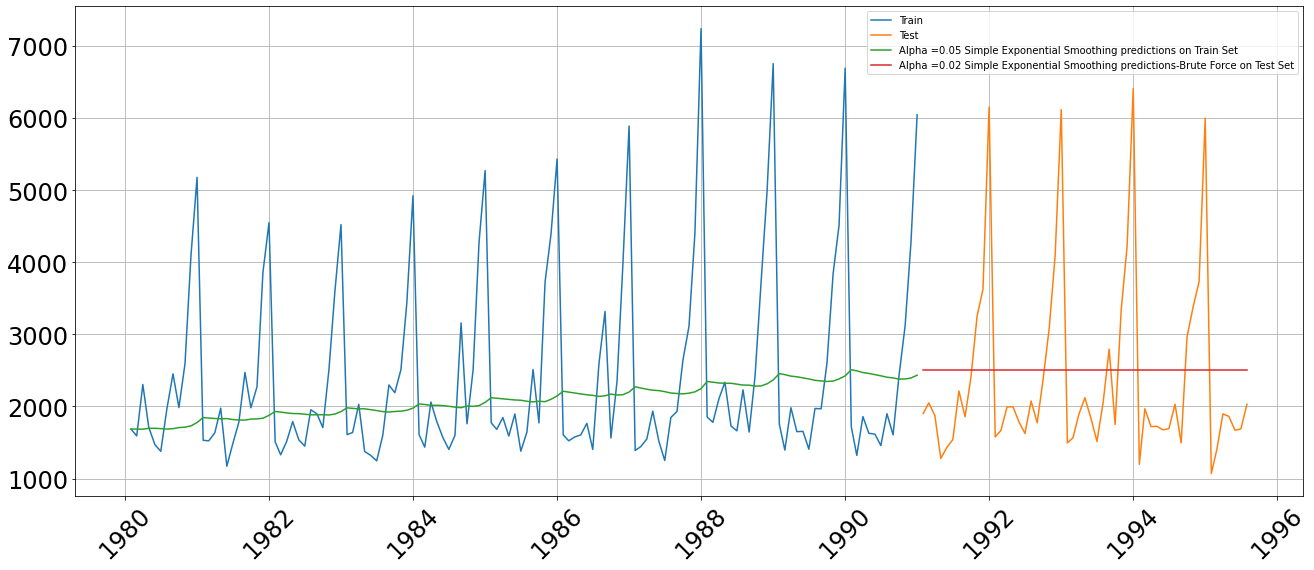

In [218]:
## Plotting on both the Training and Test data

plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict',0.02], label='Alpha =0.05 Simple Exponential Smoothing predictions on Train Set')

plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions-Brute Force on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

In [219]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.02,SimpleExponentialSmoothing-Brute_Force'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                                   1389.135175
NaiveModel                                         3864.279352
SimpleAverageModel                                 1275.081804
2pointTrailingMovingAverage                         813.400684
4pointTrailingMovingAverage                        1156.589694
6pointTrailingMovingAverage                        1283.927428
9pointTrailingMovingAverage                        1346.278315
Alpha=0.05,SimpleExponentialSmoothing              1316.135411
Alpha=0.02,SimpleExponentialSmoothing-Brute_Force  1279.495201

## Model 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

#### Holt - ETS(A, A, N) - Holt's linear method with additive errors

#### Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

#### StatsModel Method 

In [220]:
DES_train = train.copy()
DES_test = test.copy()

In [221]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train)
# Fitting the model
model_DES_autofit = model_DES.fit(optimized=True)

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES_autofit.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6885714285714285, 'smoothing_trend': 9.999999999999999e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1686.0, 'initial_trend': -95.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [222]:
model_DES_autofit.fittedvalues

Time_Stamp
1980-01-31    1591.000000
1980-02-29    1561.420827
1980-03-31    1486.796779
1980-04-30    1954.564417
1980-05-31    1692.589636
                 ...     
1990-08-31    1642.980594
1990-09-30    1523.028837
1990-10-31    2049.674471
1990-11-30    2690.251822
1990-12-31    3695.484361
Length: 132, dtype: float64

In [223]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_train['predict'] = model_DES_autofit.fittedvalues
DES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  5221.278699
1991-02-28       2049  5127.886554
1991-03-31       1874  5034.494409
1991-04-30       1279  4941.102264
1991-05-31       1432  4847.710119

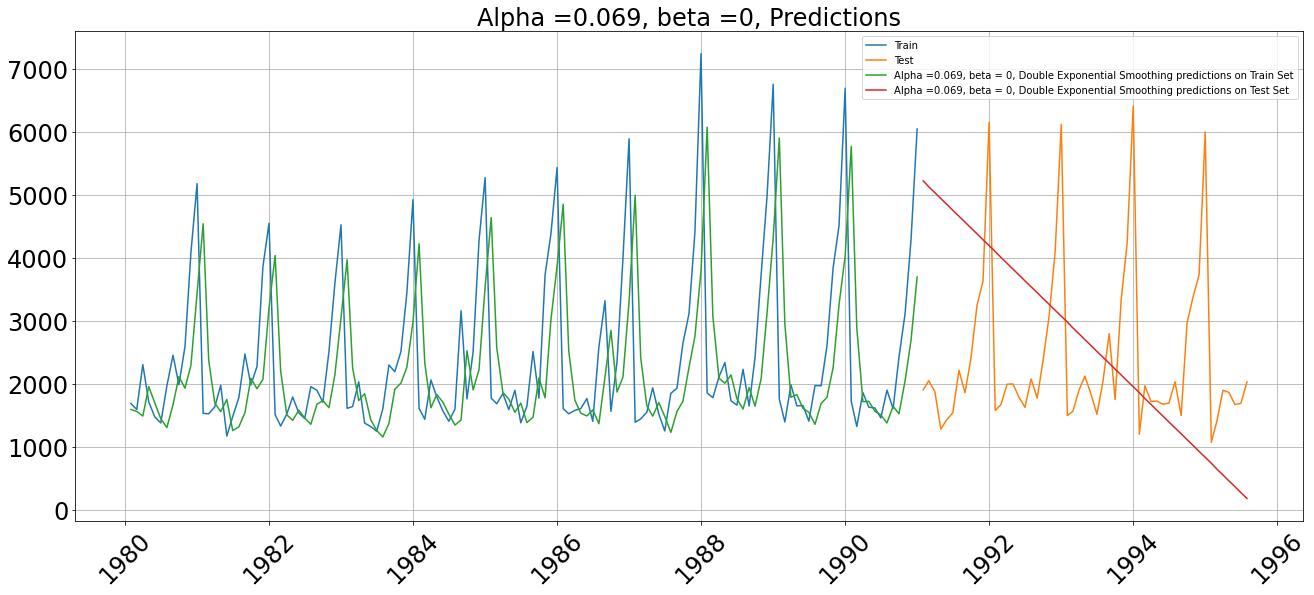

In [224]:
## Plotting on both the Training and Test data


plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict'], label='Alpha =0.069, beta = 0, Double Exponential Smoothing predictions on Train Set')
plt.plot(DES_test['predict'], label='Alpha =0.069, beta = 0, Double Exponential Smoothing predictions on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.069, beta =0, Predictions',fontsize=24);

In [225]:
## Train Data

rmse_model6_train_1 = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict'],squared=False)
print("For Alpha =0.069, beta = 0, Simple Exponential Smoothing Model forecast on the Train Data, RMSE is %3.3f" %(rmse_model6_train_1))

## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha =0.069, beta = 0, Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))



For Alpha =0.069, beta = 0, Simple Exponential Smoothing Model forecast on the Train Data, RMSE is 1349.650
For Alpha =0.069, beta = 0, Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 2007.239


In [226]:
resultsDf_6_3 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['Alpha=0.069,beta = 0, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_3])
resultsDf

Test RMSE
RegressionOnTime                                   1389.135175
NaiveModel                                         3864.279352
SimpleAverageModel                                 1275.081804
2pointTrailingMovingAverage                         813.400684
4pointTrailingMovingAverage                        1156.589694
6pointTrailingMovingAverage                        1283.927428
9pointTrailingMovingAverage                        1346.278315
Alpha=0.05,SimpleExponentialSmoothing              1316.135411
Alpha=0.02,SimpleExponentialSmoothing-Brute_Force  1279.495201
Alpha=0.069,beta = 0, DoubleExponentialSmoothing   2007.238526

#### Brute Force Method 

In [227]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [228]:
for i in np.arange(0.01,0.1,0.01):
    for j in np.arange(0.01,0.2,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [229]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
35          0.02         0.17  1488.674782  1275.105310
34          0.02         0.16  1498.243381  1283.054705
47          0.03         0.10  1458.540901  1284.214230
46          0.03         0.09  1473.516363  1286.987476
48          0.03         0.11  1446.640617  1292.441787

In [230]:
DES_test

Sparkling      predict  (predict, 0.01, 0.01)  \
Time_Stamp                                                  
1991-01-31       1902  5221.278699           -2663.893158   
1991-02-28       2049  5127.886554           -2704.838022   
1991-03-31       1874  5034.494409           -2745.782886   
1991-04-30       1279  4941.102264           -2786.727750   
1991-05-31       1432  4847.710119           -2827.672614   
1991-06-30       1540  4754.317974           -2868.617478   
1991-07-31       2214  4660.925829           -2909.562343   
1991-08-31       1857  4567.533684           -2950.507207   
1991-09-30       2408  4474.141539           -2991.452071   
1991-10-31       3252  4380.749394           -3032.396935   
1991-11-30       3627  4287.357249           -3073.341799   
1991-12-31       6153  4193.965104           -3114.286663   
1992-01-31       1577  4100.572959           -3155.231527   
1992-02-29       1667  4007.180813           -3196.176391   
1992-03-31       1993  3913.788668           -3237.121255   
1992-04-30       1997  3820.396523           -3278.066119   
1992-05-31       1783  3727.004378           -3319.010984   
1992-06-30       1625  3633.612233           -3359.955848   
1992-07-31       2076  3540.220088           -3400.900712   
1992-08-31       1773  3446.827943           -3441.845576   
1992-09-30       2377  3353.435798           -3482.790440   
1992-10-31       3088  3260.043653           -3523.735304   
1992-11-30       4096  3166.651508           -3564.680168   
1992-12-31       6119  3073.259363           -3605.625032   
1993-01-31       1494  2979.867218           -3646.569896   
1993-02-28       1564  2886.475073           -3687.514761   
1993-03-31       1898  2793.082928           -3728.459625   
1993-04-30       2121  2699.690783           -3769.404489   
1993-05-31       1831  2606.298638           -3810.349353   
1993-06-30       1515  2512.906493           -3851.294217   
1993-07-31       2048  2419.514348           -3892.239081   
1993-08-31       2795  2326.122203           -3933.183945   
1993-09-30       1749  2232.730058           -3974.128809   
1993-10-31       3339  2139.337913           -4015.073673   
1993-11-30       4227  2045.945768           -4056.018538   
1993-12-31       6410  1952.553623           -4096.963402   
1994-01-31       1197  1859.161478           -4137.908266   
1994-02-28       1968  1765.769333           -4178.853130   
1994-03-31       1720  1672.377188           -4219.797994   
1994-04-30       1725  1578.985043           -4260.742858   
1994-05-31       1674  1485.592898           -4301.687722   
1994-06-30       1693  1392.200753           -4342.632586   
1994-07-31       2031  1298.808608           -4383.577450   
1994-08-31       1495  1205.416463           -4424.522315   
1994-09-30       2968  1112.024318           -4465.467179   
1994-10-31       3385  1018.632173           -4506.412043   
1994-11-30       3729   925.240028           -4547.356907   
1994-12-31       5999   831.847883           -4588.301771   
1995-01-31       1070   738.455738           -4629.246635   
1995-02-28       1402   645.063593           -4670.191499   
1995-03-31       1897   551.671448           -4711.136363   
1995-04-30       1862   458.279303           -4752.081227   
1995-05-31       1670   364.887158           -4793.026092   
1995-06-30       1688   271.495013           -4833.970956   
1995-07-31       2031   178.102868           -4874.915820   

            (predict, 0.01, 0.02)  (predict, 0.01, 0.03)  \
Time_Stamp                                                 
1991-01-31            -964.214011             417.649686   
1991-02-28            -965.556540             443.966907   
1991-03-31            -966.899069             470.284129   
1991-04-30            -968.241598             496.601350   
1991-05-31            -969.584126             522.918572   
1991-06-30            -970.926655             549.235793   
1991-07-31            -972.269184             575.5530

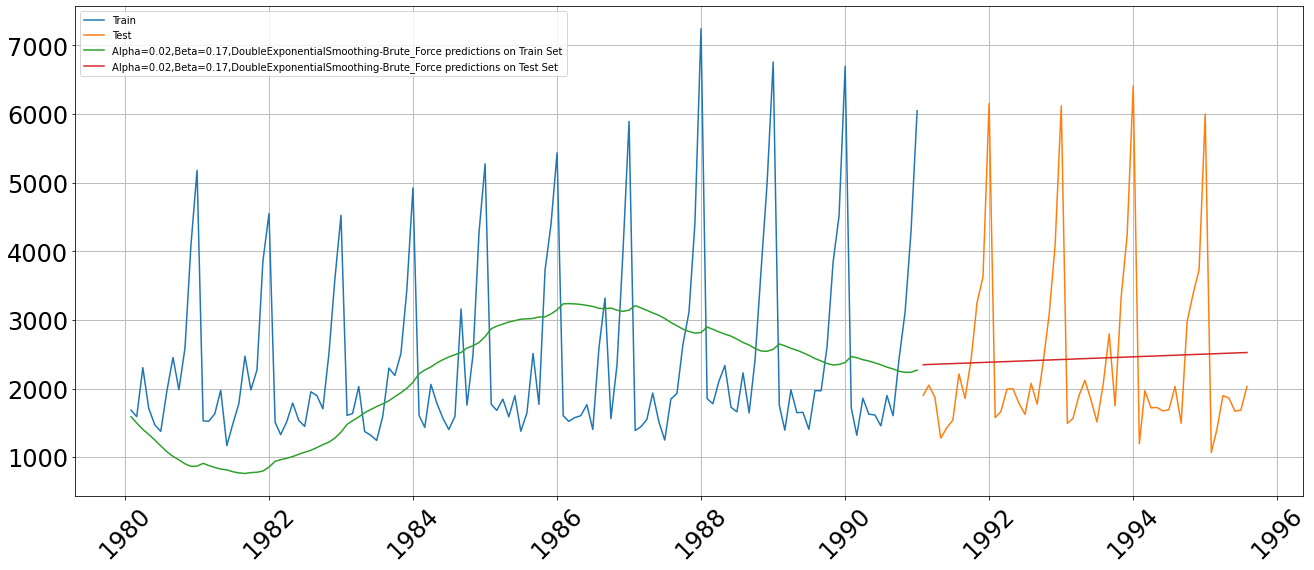

In [231]:
## Plotting on both the Training and Test data


plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.02, 0.17], label='Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing-Brute_Force predictions on Train Set')
plt.plot(DES_test['predict', 0.02, 0.17], label='Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing-Brute_Force predictions on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

In [232]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing-Brute_Force'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.05,SimpleExponentialSmoothing               1316.135411
Alpha=0.02,SimpleExponentialSmoothing-Brute_Force   1279.495201
Alpha=0.069,beta = 0, DoubleExponentialSmoothing    2007.238526
Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing...  1275.105310

## Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

#### StatsModel Method 

In [233]:
TES_train = train.copy()
TES_test = test.copy()

In [234]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [235]:
model_TES_autofit = model_TES.fit(optimized=True)

In [236]:
model_TES_autofit.params

{'smoothing_level': 0.11108840858679117,
 'smoothing_trend': 0.061712060020663685,
 'smoothing_seasonal': 0.3950814802151603,
 'damping_trend': nan,
 'initial_level': 1639.9088356475902,
 'initial_trend': -11.928143593549056,
 'initial_seasons': array([1.05065032, 1.02086214, 1.41078482, 1.20263518, 0.97315225,
        0.96689379, 1.31724304, 1.70471609, 1.37289733, 1.81035002,
        2.83962708, 3.60997333]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [237]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1577.208163
1991-02-28       2049   1333.663154
1991-03-31       1874   1745.977341
1991-04-30       1279   1630.435405
1991-05-31       1432   1523.306429

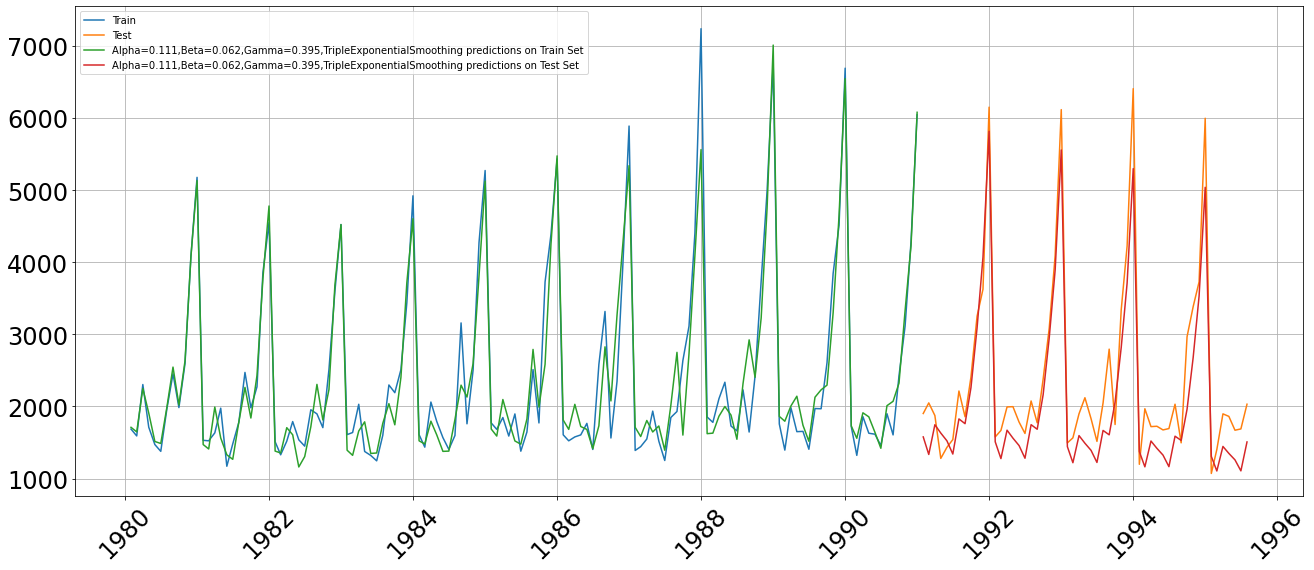

In [238]:
## Plotting on both the Training and Test using autofit


plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExponentialSmoothing predictions on Train Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

In [239]:
## Train Data

rmse_model7_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.062,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Train Data,  RMSE is %3.3f" %(rmse_model7_train_1))

## Test Data

rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.062,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.111,Beta=0.062,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Train Data,  RMSE is 356.943
For Alpha=0.111,Beta=0.062,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.659


In [240]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.05,SimpleExponentialSmoothing               1316.135411
Alpha=0.02,SimpleExponentialSmoothing-Brute_Force   1279.495201
Alpha=0.069,beta = 0, DoubleExponentialSmoothing    2007.238526
Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing...  1275.105310
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...   469.659106

#### Brute Force Method 

In [241]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [242]:
for i in np.arange(0.01,0.1,0.01):
    for j in np.arange(0.01,0.1,0.01):
        for k in np.arange(0.15,0.45,0.01):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=round(i,3),smoothing_trend=round(j,3),smoothing_seasonal=round(k,3),optimized=False,use_brute=True)
            TES_train['predict',round(i,3),round(j,3),round(k,3)] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',round(i,3),round(j,3),round(k,3)] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',round(i,3),round(j,3),round(k,3)],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',round(i,3),round(j,3),round(k,3)],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':round(i,3),'Beta Values':round(j,3),'Gamma Values':round(k,3),
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [243]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
1468          0.06         0.03          0.26  390.200218  301.750190
1467          0.06         0.03          0.25  391.017391  301.758388
1469          0.06         0.03          0.27  389.433585  301.958369
1466          0.06         0.03          0.24  391.886920  302.004355
1190          0.05         0.03          0.27  402.067198  302.238152

In [244]:
TES_test

Sparkling  auto_predict  (predict, 0.01, 0.01, 0.15)  \
Time_Stamp                                                         
1991-01-31       1902   1577.208163                   882.398244   
1991-02-28       2049   1333.663154                   768.477916   
1991-03-31       1874   1745.977341                   969.287875   
1991-04-30       1279   1630.435405                   888.222709   
1991-05-31       1432   1523.306429                   799.663685   
1991-06-30       1540   1339.503840                   693.804955   
1991-07-31       2214   1826.890422                   939.671711   
1991-08-31       1857   1760.667746                   974.255889   
1991-09-30       2408   2260.399353                  1048.988712   
1991-10-31       3252   3089.480192                  1436.788371   
1991-11-30       3627   4073.680714                  1917.365532   
1991-12-31       6153   5818.749010                  2338.565191   
1992-01-31       1577   1509.688730                   625.255029   
1992-02-29       1667   1276.365344                   538.958927   
1992-03-31       1993   1670.695864                   672.404473   
1992-04-30       1997   1559.882257                   609.042939   
1992-05-31       1783   1457.150467                   541.558674   
1992-06-30       1625   1281.118975                   463.677859   
1992-07-31       2076   1746.971585                   619.133549   
1992-08-31       1773   1683.364065                   632.196955   
1992-09-30       2377   2160.790060                   669.590784   
1992-10-31       3088   2952.833891                   900.981986   
1992-11-30       4096   3892.837120                  1179.409372   
1992-12-31       6119   5559.477148                  1408.672824   
1993-01-31       1494   1442.169298                   368.111814   
1993-02-28       1564   1219.067535                   309.439938   
1993-03-31       1898   1595.414387                   375.521071   
1993-04-30       2121   1489.329109                   329.863169   
1993-05-31       1831   1390.994505                   283.453663   
1993-06-30       1515   1222.734109                   233.550763   
1993-07-31       2048   1667.052748                   298.595386   
1993-08-31       2795   1606.060385                   290.138020   
1993-09-30       1749   2061.180766                   290.192857   
1993-10-31       3339   2816.187591                   365.175601   
1993-11-30       4227   3711.993527                   441.453211   
1993-12-31       6410   5300.205286                   478.780457   
1994-01-31       1197   1374.649865                   110.968599   
1994-02-28       1968   1161.769726                    79.920949   
1994-03-31       1720   1520.132910                    78.637669   
1994-04-30       1725   1418.775961                    50.683399   
1994-05-31       1674   1324.838543                    25.348653   
1994-06-30       1693   1164.349244                     3.423666   
1994-07-31       2031   1587.133911                   -21.942776   
1994-08-31       1495   1528.756704                   -51.920914   
1994-09-30       2968   1961.571473                   -89.205071   
1994-10-31       3385   2679.541291                  -170.630784   
1994-11-30       3729   3531.149934                  -296.502950   
1994-12-31       5999   5040.933424                  -451.111910   
1995-01-31       1070   1307.130432                  -146.174616   
1995-02-28       1402   1104.471916                  -149.598040   
1995-03-31       1897   1444.851433                  -218.245732   
1995-04-30       1862   1348.222814                  -228.496371   
1995-05-31       1670   1258.682581                  -232.756358   
1995-06-30       1688   1105.964378                  -226.703430   
1995-07-31       2031   1507.215074                  -342.480938   

            (predict, 0.01, 0.01, 0.16)  (predict, 0.01, 0.01, 0.17)  \
Time_Stamp                                                     

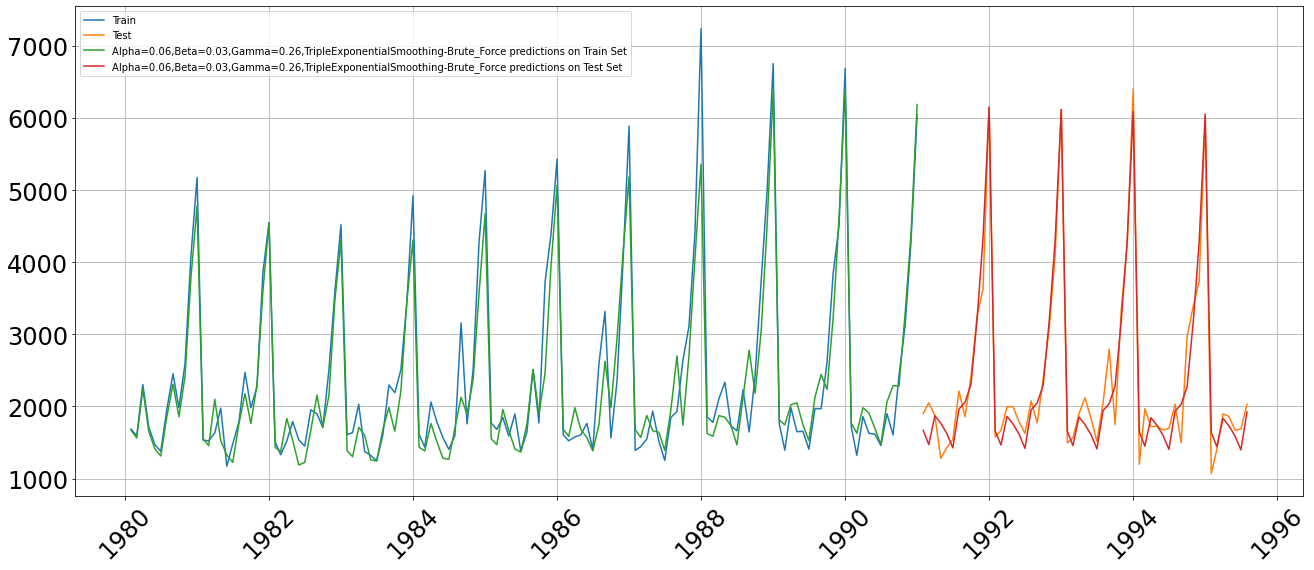

In [245]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_train['predict', 0.06, 0.03, 0.26], label='Alpha=0.06,Beta=0.03,Gamma=0.26,TripleExponentialSmoothing-Brute_Force predictions on Train Set')
plt.plot(TES_test['predict', 0.06, 0.03, 0.26], label='Alpha=0.06,Beta=0.03,Gamma=0.26,TripleExponentialSmoothing-Brute_Force predictions on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

In [246]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.06,Beta=0.03,Gamma=0.26,TripleExponentialSmoothing-Brute_Force'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.05,SimpleExponentialSmoothing               1316.135411
Alpha=0.02,SimpleExponentialSmoothing-Brute_Force   1279.495201
Alpha=0.069,beta = 0, DoubleExponentialSmoothing    2007.238526
Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing...  1275.105310
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...   469.659106
Alpha=0.06,Beta=0.03,Gamma=0.26,TripleExponenti...   301.750190

In [247]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.06,Beta=0.03,Gamma=0.26,TripleExponenti...   301.750190
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...   469.659106
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing...  1275.105310
Alpha=0.02,SimpleExponentialSmoothing-Brute_Force   1279.495201
6pointTrailingMovingAverage                         1283.927428
Alpha=0.05,SimpleExponentialSmoothing               1316.135411
9pointTrailingMovingAverage                         1346.278315
RegressionOnTime                                    1389.135175
Alpha=0.069,beta = 0, DoubleExponentialSmoothing    2007.238526
NaiveModel                                          3864.279352

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters 
$\alpha$ = 0.06,

$\beta$ = 0.03 and 

$\gamma$ = 0.26.

#### Model 5 to Model 7 Simple,Double & Triple Exponential  

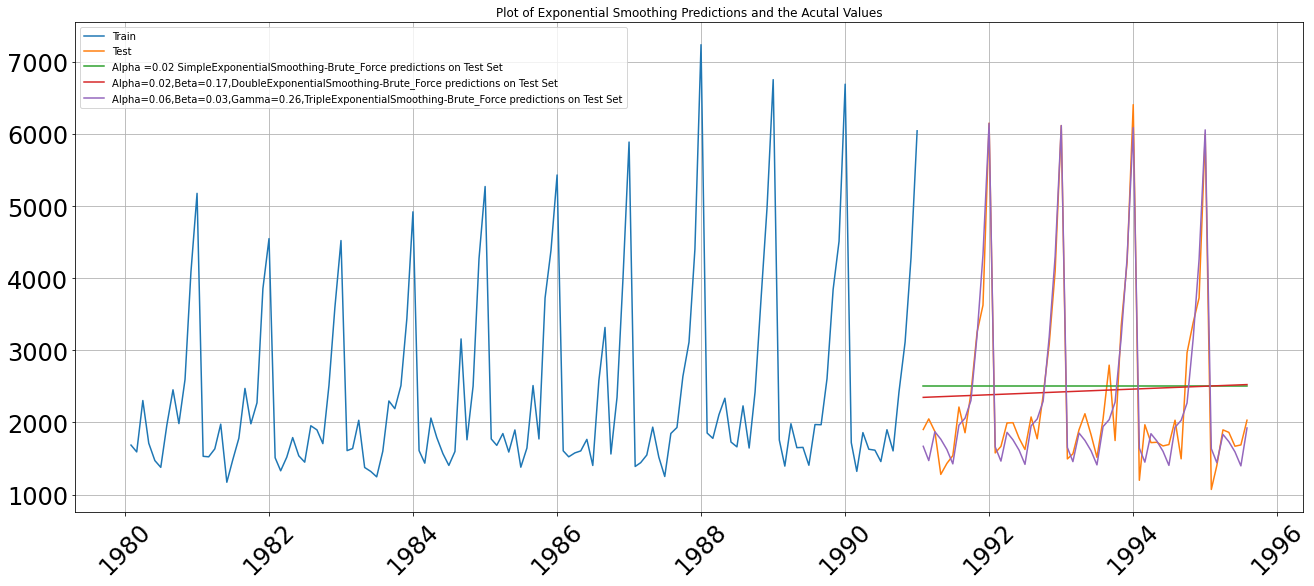

In [248]:
## Plotting on both the Training and Test data


plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 SimpleExponentialSmoothing-Brute_Force predictions on Test Set')

plt.plot(DES_test['predict', 0.02, 0.17], label='Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing-Brute_Force predictions on Test Set')

plt.plot(TES_test['predict', 0.06, 0.03, 0.26], label='Alpha=0.06,Beta=0.03,Gamma=0.26,TripleExponentialSmoothing-Brute_Force predictions on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05. 

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [249]:
from statsmodels.tsa.stattools import adfuller

In [250]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=5).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

The Model is being built on Train Data, ADF test is done on Train dataset

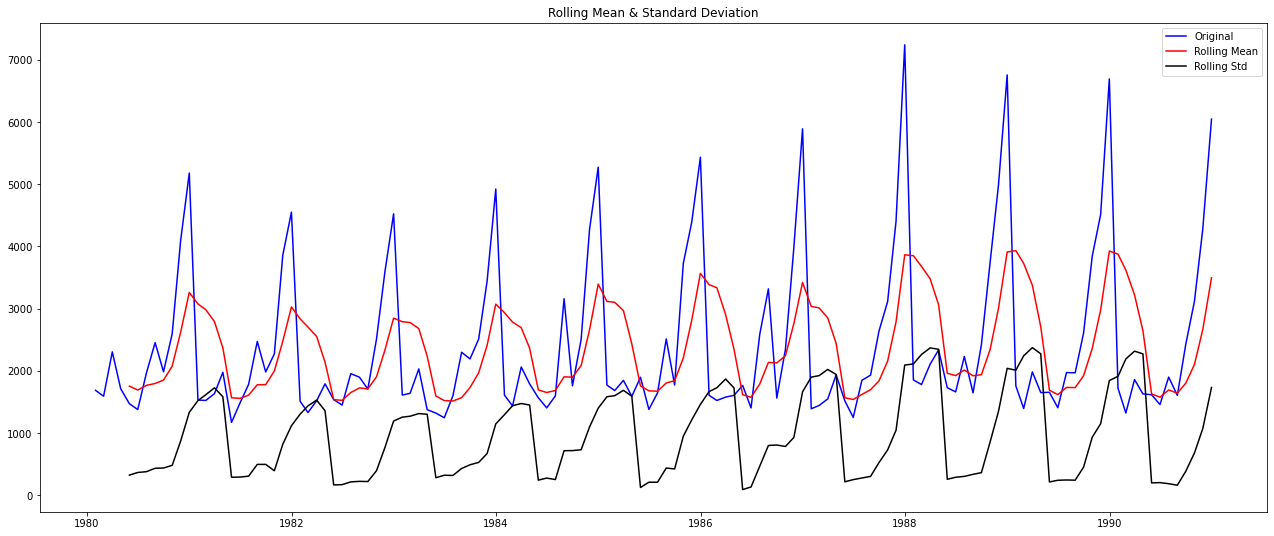

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [251]:
test_stationarity(train['Sparkling'])

We see that the series is not stationary at $\alpha$ = 0.05, for Train data on which the model is built on

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

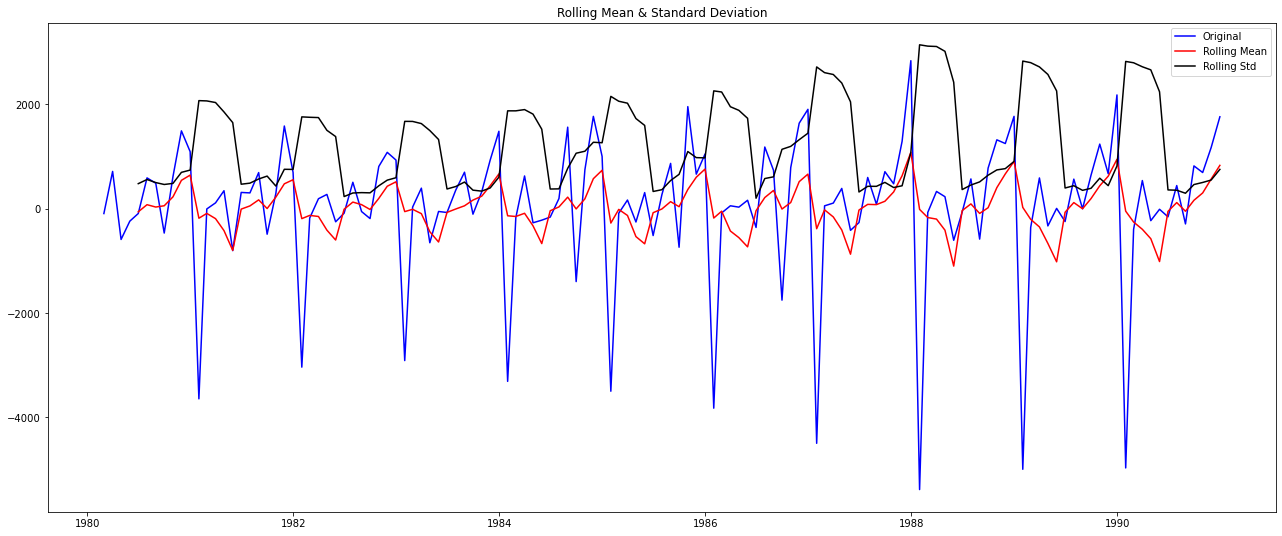

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [252]:
test_stationarity(train['Sparkling'].diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Automated version of the ARIMA

In [253]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [254]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 3
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [255]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [256]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,round(ARIMA_model.aic,2)))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.58
ARIMA(0, 1, 1) - AIC:2264.91
ARIMA(0, 1, 2) - AIC:2232.78
ARIMA(0, 1, 3) - AIC:2233.02
ARIMA(1, 1, 0) - AIC:2268.53
ARIMA(1, 1, 1) - AIC:2235.01
ARIMA(1, 1, 2) - AIC:2233.6
ARIMA(1, 1, 3) - AIC:2234.57
ARIMA(2, 1, 0) - AIC:2262.04
ARIMA(2, 1, 1) - AIC:2232.36
ARIMA(2, 1, 2) - AIC:2210.63
ARIMA(2, 1, 3) - AIC:2227.56
ARIMA(3, 1, 0) - AIC:2259.47
ARIMA(3, 1, 1) - AIC:2233.92
ARIMA(3, 1, 2) - AIC:2228.93
ARIMA(3, 1, 3) - AIC:2225.66


In [257]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2210.625335
15  (3, 1, 3)  2225.661559
11  (2, 1, 3)  2227.558862
14  (3, 1, 2)  2228.927304
9   (2, 1, 1)  2232.360490
2   (0, 1, 2)  2232.783098
3   (0, 1, 3)  2233.016605
6   (1, 1, 2)  2233.597647
13  (3, 1, 1)  2233.921753
7   (1, 1, 3)  2234.574142
5   (1, 1, 1)  2235.013945
12  (3, 1, 0)  2259.471555
8   (2, 1, 0)  2262.035600
1   (0, 1, 1)  2264.906439
4   (1, 1, 0)  2268.528061
0   (0, 1, 0)  2269.582796

In [258]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.313
Method:                       css-mle   S.D. of innovations           1013.708
Date:                Sun, 13 Nov 2022   AIC                           2210.625
Time:                        14:41:25   BIC                           2227.877
Sample:                    02-29-1980   HQIC                          2217.635
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5850      0.519     10.765      0.000       4.568       6.602
ar.L1.D.Sparkling     1.2699      0.075     17.041      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

In [259]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
predicted_auto_ARIMA[0]

array([4249.79539825, 2821.29356447, 2015.62106589, 1794.33230414,
       1966.25315832, 2310.15142423, 2652.17795029, 2895.49184055,
       3014.50106613, 3030.95372989, 2986.80306344, 2923.14208443,
       2868.65323361, 2836.74087701, 2828.36004006, 2837.21483128,
       2854.77525547, 2873.73598595, 2889.59834446, 2900.7417413 ,
       2907.62822563, 2911.75234209, 2914.75315835, 2917.87490098,
       2921.77943912, 2926.61029448, 2932.17896627, 2938.16568537,
       2944.26997512, 2950.28938988, 2956.13516466, 2961.8079816 ,
       2967.35843001, 2972.85037008, 2978.3365582 , 2983.84821637,
       2989.39544048, 2994.97356161, 3000.57099542, 3006.17564659,
       3011.77864463, 3017.37550049, 3022.96548255, 3028.55017634,
       3034.13200513, 3039.71315803, 3045.29505748, 3050.8782836 ,
       3056.46277621, 3062.04813398, 3067.63388094, 3073.2196375 ,
       3078.80518823, 3084.39047221, 3089.97553276])

In [260]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.0822986263593


In [261]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Automated_ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.05,SimpleExponentialSmoothing               1316.135411
Alpha=0.02,SimpleExponentialSmoothing-Brute_Force   1279.495201
Alpha=0.069,beta = 0, DoubleExponentialSmoothing    2007.238526
Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing...  1275.105310
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...   469.659106
Alpha=0.06,Beta=0.03,Gamma=0.26,TripleExponenti...   301.750190
Automated_ARIMA(2,1,2)                              1374.082299

In [262]:
auto_arima_test = test.copy()
auto_arima_test['predict'] = predicted_auto_ARIMA[0]
auto_arima_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  4249.795398
1991-02-28       2049  2821.293564
1991-03-31       1874  2015.621066
1991-04-30       1279  1794.332304
1991-05-31       1432  1966.253158

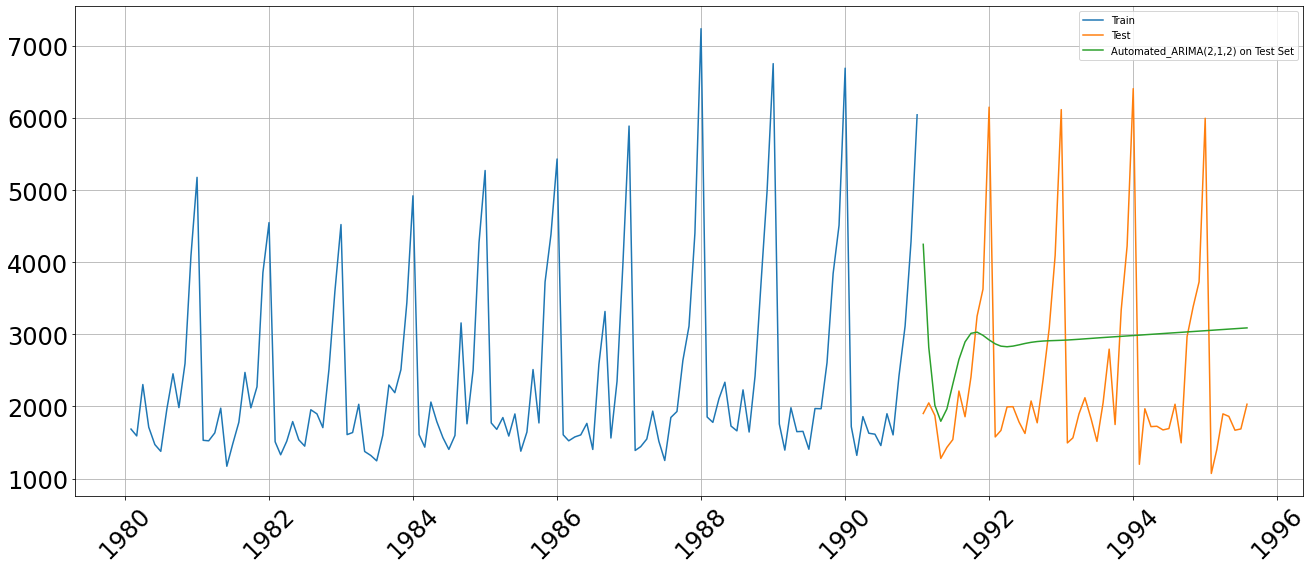

In [263]:
## Plotting on both the Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

#plt.plot(SES_train['predict',0.02], label='Alpha =0.05 Simple Exponential Smoothing predictions on Train Set')

plt.plot(auto_arima_test['predict'], label='Automated_ARIMA(2,1,2) on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

### Automated version of the SARIMA

In [264]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

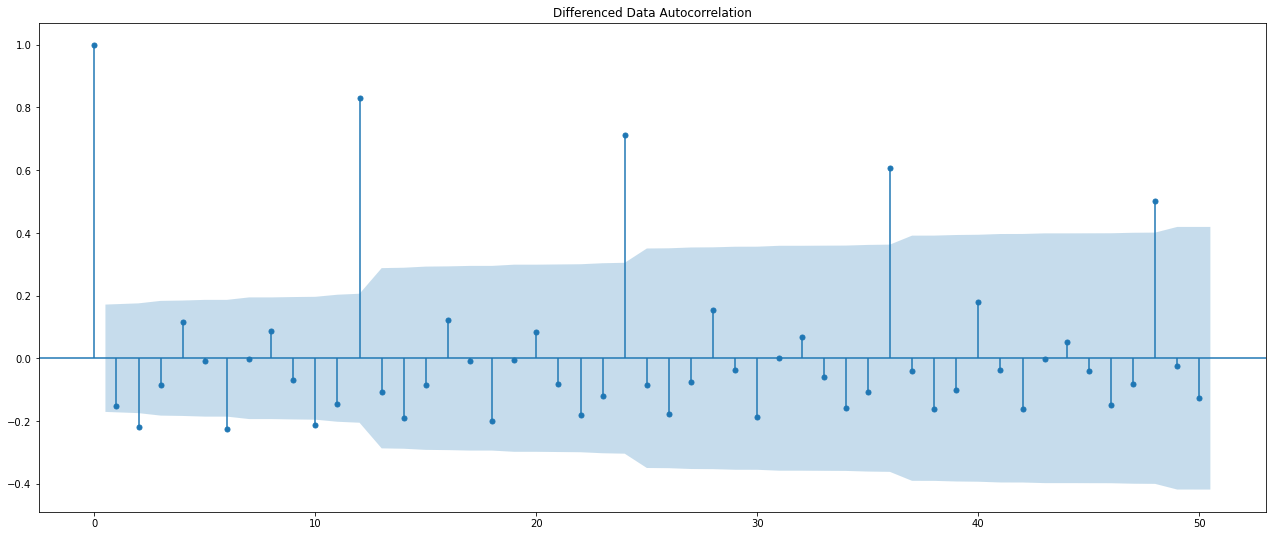

In [265]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')

plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality 12.

### Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

If the Seasonality is F = 12, then the ACF & PACF to be multiples of 12

In [302]:
import itertools
p = q = range(0, 3)
d= range(1,2)

P = range(0, 3)
Q = range(0, 3)
D = range(0,1)


pdq_12 = list(itertools.product(p, d, q))

model_pdq_12 = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq_12)):
    print('Model: {}'.format(pdq_12[i]))

for i in range(1,len(model_pdq_12)):
    print('Model: {}'.format(model_pdq_12[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (0, 0, 1, 12)
Model: (0, 0, 2, 12)
Model: (1, 0, 0, 12)
Model: (1, 0, 1, 12)
Model: (1, 0, 2, 12)
Model: (2, 0, 0, 12)
Model: (2, 0, 1, 12)
Model: (2, 0, 2, 12)


In [303]:
SARIMA_AIC_12 = pd.DataFrame(columns=['param','seasonal', 'AIC','RMSE'])
SARIMA_AIC_12

Empty DataFrame
Columns: [param, seasonal, AIC, RMSE]
Index: []

In [304]:
import statsmodels.api as sm

for param in pdq_12:
    for param_seasonal in model_pdq_12:
        SARIMA_model_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_12 = SARIMA_model_12.fit(maxiter=100)
        predicted_SARIMA = results_SARIMA_12.forecast(steps=len(test))
        RMSE = mean_squared_error(test['Sparkling'],predicted_SARIMA,squared=False)
        
        print('SARIMA{}x{} - AIC: {} - RMSE: {}'.format(param, param_seasonal, round(results_SARIMA_12.aic,2),round(RMSE,2)))
        SARIMA_AIC_12 = SARIMA_AIC_12.append({'param':param,
                                              'seasonal':param_seasonal ,
                                              'AIC': results_SARIMA_12.aic,
                                               'RMSE':RMSE}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC: 2251.36 - RMSE: 3864.28
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC: 1956.26 - RMSE: 2745.86
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC: 1723.15 - RMSE: 2746.87
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC: 1837.44 - RMSE: 1318.75
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC: 1806.99 - RMSE: 1787.71
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC: 1633.21 - RMSE: 1833.95
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC: 1648.38 - RMSE: 1756.45
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC: 1647.21 - RMSE: 1914.7
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC: 1630.99 - RMSE: 1878.86
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC: 2230.16 - RMSE: 3122.14
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC: 1923.77 - RMSE: 1216.14
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC: 1692.71 - RMSE: 1099.39
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC: 1797.18 - RMSE: 589.28
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC: 1738.09 - RMSE: 603.65
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC: 1570.15 - RMSE: 581.33
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC: 1605.68 - RMSE: 769.98
SARIMA(0, 1, 1)x(2, 0, 1, 12)

In [306]:
SARIMA_AIC_12.sort_values(by=['AIC']).head()

param       seasonal          AIC        RMSE
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247  528.629305
53  (1, 1, 2)  (2, 0, 2, 12)  1556.076771  548.009665
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563  526.467030
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507  507.882891
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402  555.514403

In [307]:
SARIMA_AIC_12.sort_values(by=['RMSE']).head()

param       seasonal          AIC        RMSE
48  (1, 1, 2)  (1, 0, 0, 12)  1771.825980  323.585667
75  (2, 1, 2)  (1, 0, 0, 12)  1757.214094  323.950446
21  (0, 1, 2)  (1, 0, 0, 12)  1790.032633  333.658963
39  (1, 1, 1)  (1, 0, 0, 12)  1775.142447  338.975716
24  (0, 1, 2)  (2, 0, 0, 12)  1603.965477  441.467331

##### Checking RMSE with the least AIC p,d,q P,D,Q,F values

The RMSE is low at AIC 1771, here in this case low RMSE is taken into consideration rather than least AIC value

In [316]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1,1,2),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, [], 12)   Log Likelihood                -880.913
Date:                             Sun, 13 Nov 2022   AIC                           1771.826
Time:                                     18:04:46   BIC                           1785.679
Sample:                                          0   HQIC                          1777.451
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5626      0.151     -3.717      0.000      -0.859      -0.266
ma.L1         -0.1861      

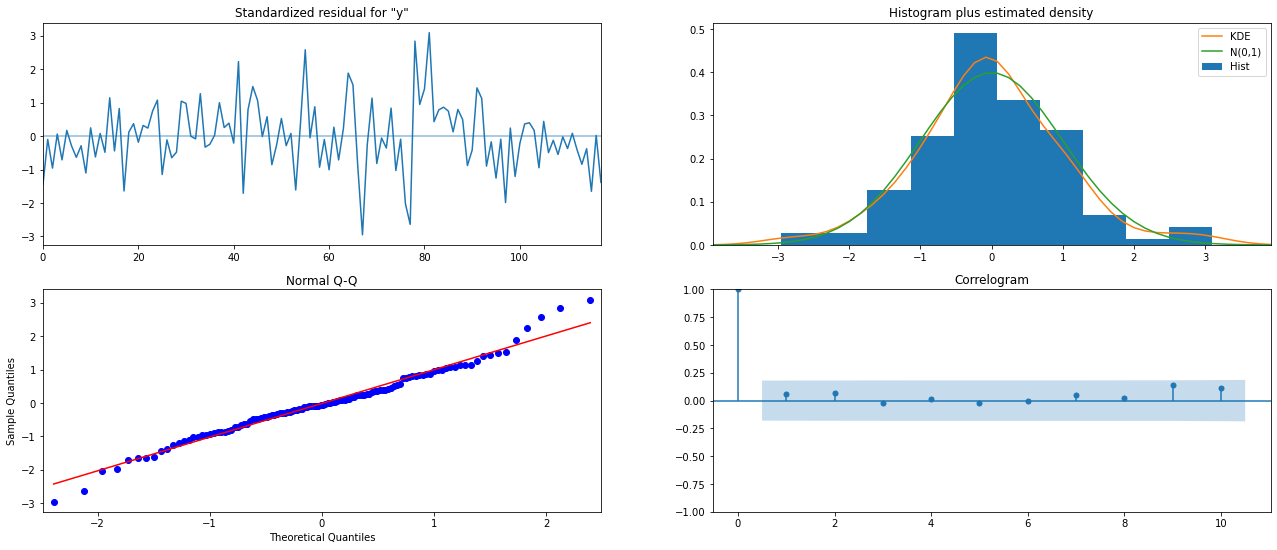

In [317]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [318]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.forecast(steps=len(test))
predicted_auto_SARIMA_12

array([1570.44422073, 1495.71825751, 1837.35194859, 1713.64126402,
       1646.63365866, 1526.3639402 , 1931.44612302, 1660.23031311,
       2437.36842318, 3101.69472021, 4217.97310826, 5901.69396237,
       1623.51333507, 1552.41613453, 1878.69539469, 1760.57954036,
       1696.49464665, 1581.60018136, 1968.66451546, 1709.51038881,
       2452.10961821, 3086.91859982, 4153.59162066, 5762.49460721,
       1674.42127215, 1606.48370001, 1918.2640417 , 1805.39695357,
       1744.15972009, 1634.37080636, 2004.23529624, 1756.5971102 ,
       2466.19774191, 3072.79796765, 4092.07165398, 5629.48044735,
       1723.06723119, 1658.14857475, 1956.07445488, 1848.2227976 ,
       1789.70673911, 1684.79647253, 2038.22543839, 1801.59145379,
       2479.65983915, 3059.30480738, 4033.28542667, 5502.37698546,
       1769.55152893, 1707.51763749, 1992.20470156, 1889.14560628,
       1833.22980305, 1732.98139304, 2070.70517386])

In [319]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12,squared=False)
print(rmse)

323.5856670787873


In [324]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Automated_SARIMA(1, 1, 2)(1, 0, 0, 12)'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.05,SimpleExponentialSmoothing               1316.135411
Alpha=0.02,SimpleExponentialSmoothing-Brute_Force   1279.495201
Alpha=0.069,beta = 0, DoubleExponentialSmoothing    2007.238526
Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing...  1275.105310
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...   469.659106
Alpha=0.06,Beta=0.03,Gamma=0.26,TripleExponenti...   301.750190
Automated_ARIMA(2,1,2)                              1374.082299
Automated_SARIMA(1, 1, 2)(1, 0, 0, 12)               323.585667

In [325]:
auto_sarima_test_12 = test.copy() 
auto_sarima_test_12['predict'] = predicted_auto_SARIMA_12
auto_sarima_test_12.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  1570.444221
1991-02-28       2049  1495.718258
1991-03-31       1874  1837.351949
1991-04-30       1279  1713.641264
1991-05-31       1432  1646.633659

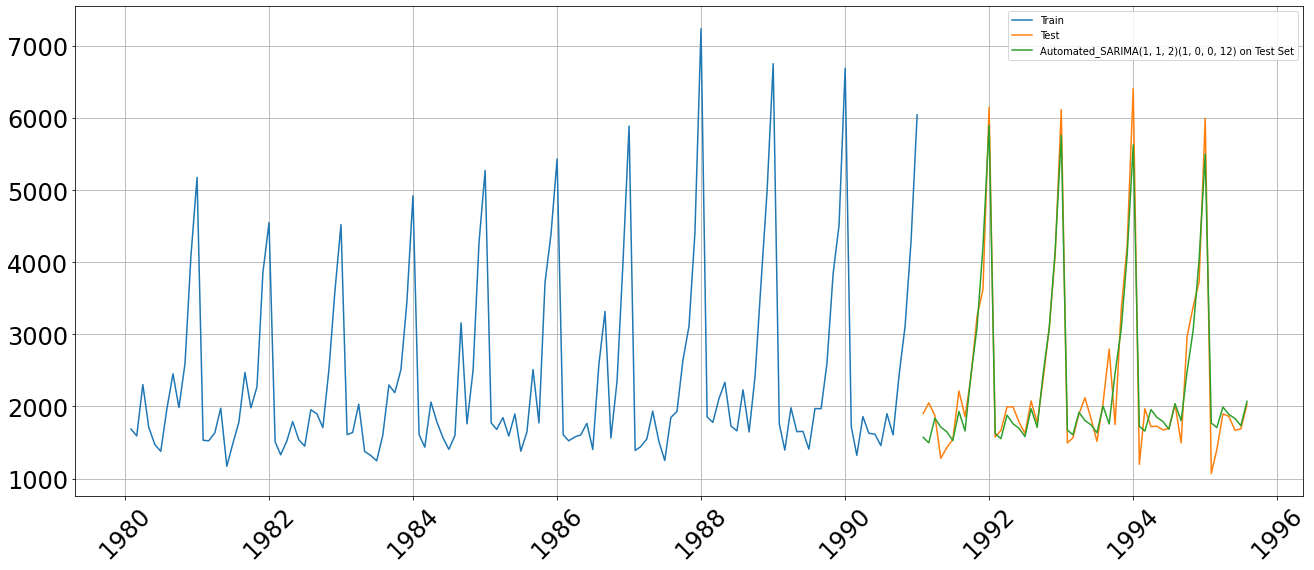

In [326]:
## Plotting on both the Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

#plt.plot(SES_train['predict',0.02], label='Alpha =0.05 Simple Exponential Smoothing predictions on Train Set')

plt.plot(auto_sarima_test_12['predict'], label='Automated_SARIMA(1, 1, 2)(1, 0, 0, 12) on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. Let us look at the ACF and the PACF plots once more.

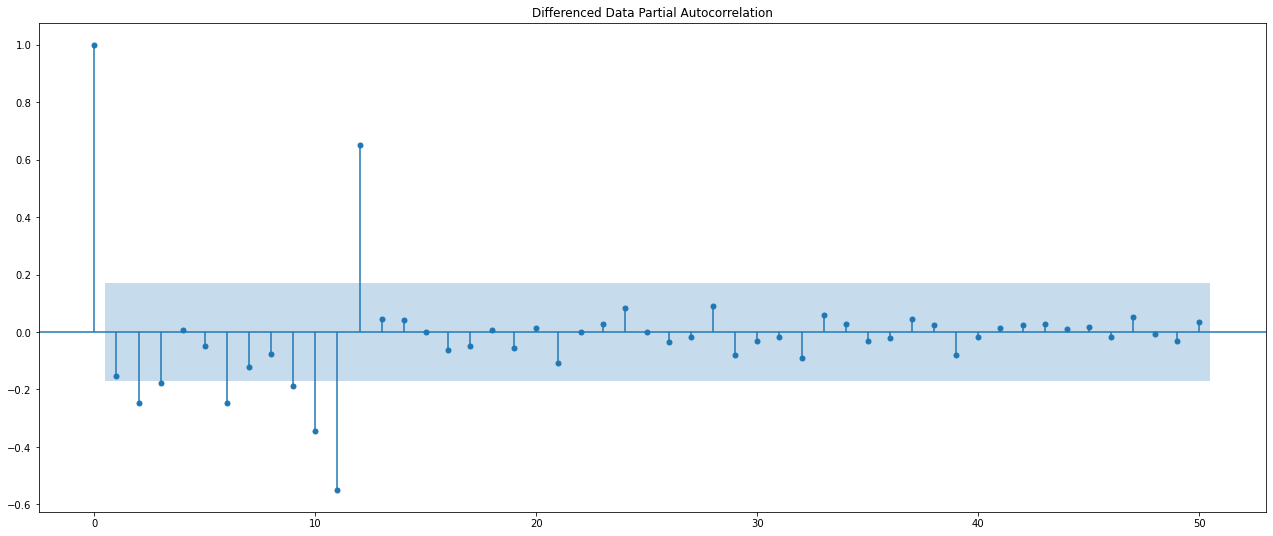

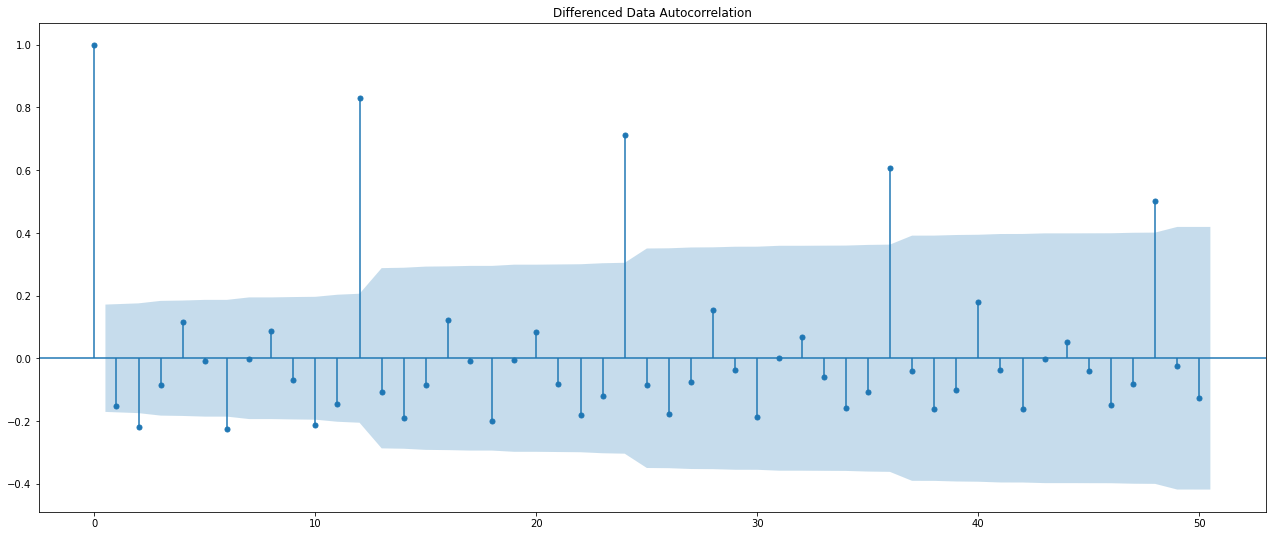

In [331]:
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation', method='ywmle')
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')

plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.
* The difference to make the series stationary is d  = 1, which is obtained from adf test

By looking at the above plots, we can say that  PACF at cuts-off at lag 0 and ACF plot cuts-off at lag 0.

But, on a close look the first lag seems to be very close in both cases, therefore p= 3, q = 2

In [344]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.050
Date:                Sun, 13 Nov 2022   AIC                           2228.927
Time:                        18:11:51   BIC                           2249.054
Sample:                    02-29-1980   HQIC                          2237.106
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9919        nan        nan        nan         nan         nan
ar.L1.D.Sparkling    -0.4417        nan        nan        nan         nan         nan
ar.L2.D.Sparkling     0.

In [345]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
predicted_manual_ARIMA[0]

array([3916.91160677, 2897.39482889, 2259.07059573, 2768.14426059,
       2610.00793315, 3004.70956222, 2662.57106175, 2983.15631746,
       2645.67797432, 2987.40816554, 2660.57097168, 3002.95008632,
       2673.81423639, 3014.74604431, 2685.37884002, 3026.54205127,
       2697.36348839, 3038.57256472, 2709.37396677, 3050.55882374,
       2721.35327416, 3062.53875231, 2733.33684643, 3074.52264598,
       2745.32156537, 3086.50618776, 2757.30580093, 3098.4895477 ,
       2769.29005592, 3110.47296399, 2781.2743375 , 3122.45638103,
       2793.25861285, 3134.4397944 , 2805.24288771, 3146.42320842,
       2817.22716304, 3158.40662255, 2829.21143832, 3170.39003662,
       2841.19571357, 3182.37345069, 2853.17998884, 3194.35686477,
       2865.1642641 , 3206.34027885, 2877.14853936, 3218.32369293,
       2889.13281462, 3230.30710701, 2901.11708987, 3242.29052109,
       2913.10136513, 3254.27393517, 2925.08564038])

In [346]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1379.2320128231995


In [347]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['manual_ARIMA(3, 1, 2)'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.05,SimpleExponentialSmoothing               1316.135411
Alpha=0.02,SimpleExponentialSmoothing-Brute_Force   1279.495201
Alpha=0.069,beta = 0, DoubleExponentialSmoothing    2007.238526
Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing...  1275.105310
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...   469.659106
Alpha=0.06,Beta=0.03,Gamma=0.26,TripleExponenti...   301.750190
Automated_ARIMA(2,1,2)                              1374.082299
Automated_SARIMA(1, 1, 2)(1, 0, 0, 12)               323.585667
manual_ARIMA(3, 1, 2)                               1379.232013

In [348]:
manual_arima_test = test.copy()
manual_arima_test['predict'] = predicted_manual_ARIMA[0]
manual_arima_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  3916.911607
1991-02-28       2049  2897.394829
1991-03-31       1874  2259.070596
1991-04-30       1279  2768.144261
1991-05-31       1432  2610.007933

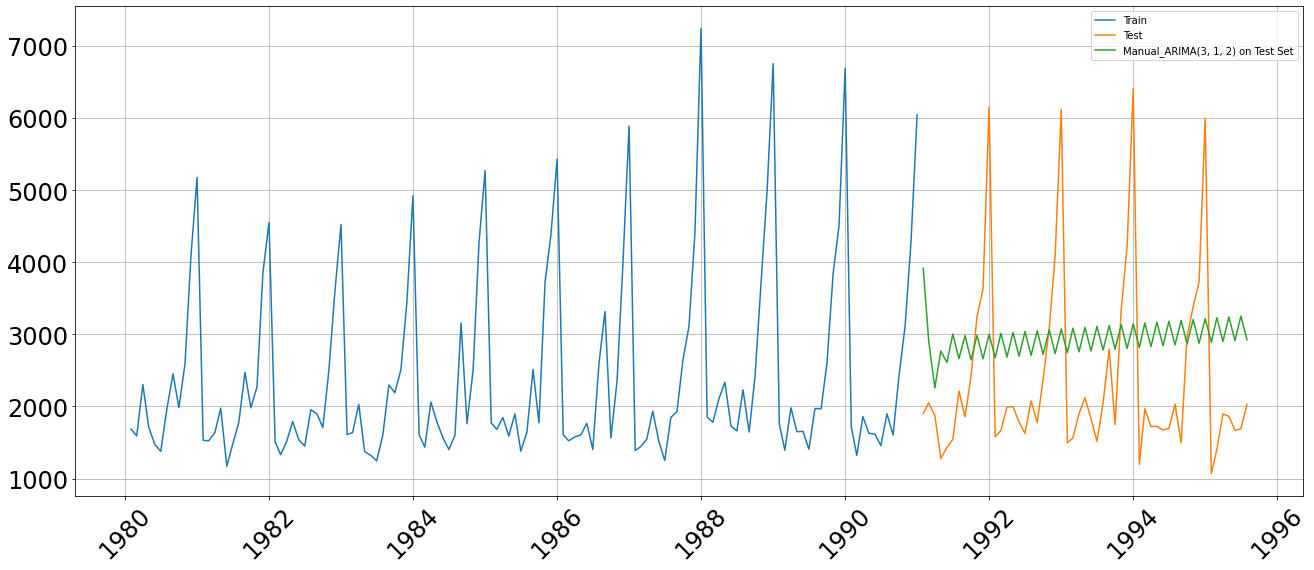

In [350]:
## Plotting on both the Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

#plt.plot(SES_train['predict',0.02], label='Alpha =0.05 Simple Exponential Smoothing predictions on Train Set')

plt.plot(manual_arima_test['predict'], label='Manual_ARIMA(3, 1, 2) on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

#### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. Seasonality at 12

Let us look at the ACF and the PACF plots once more.

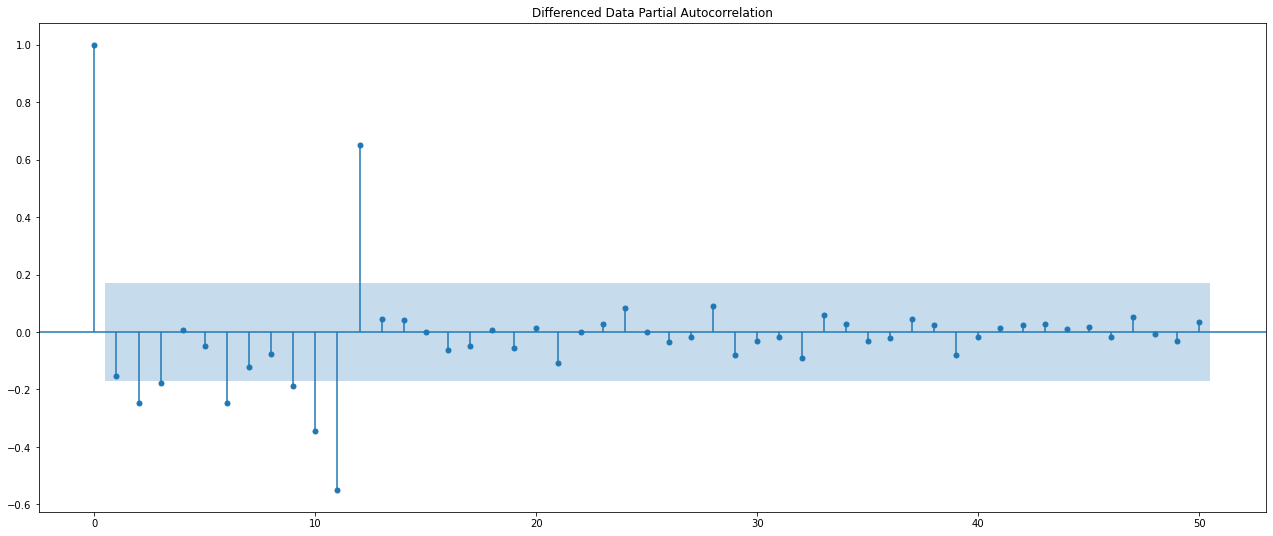

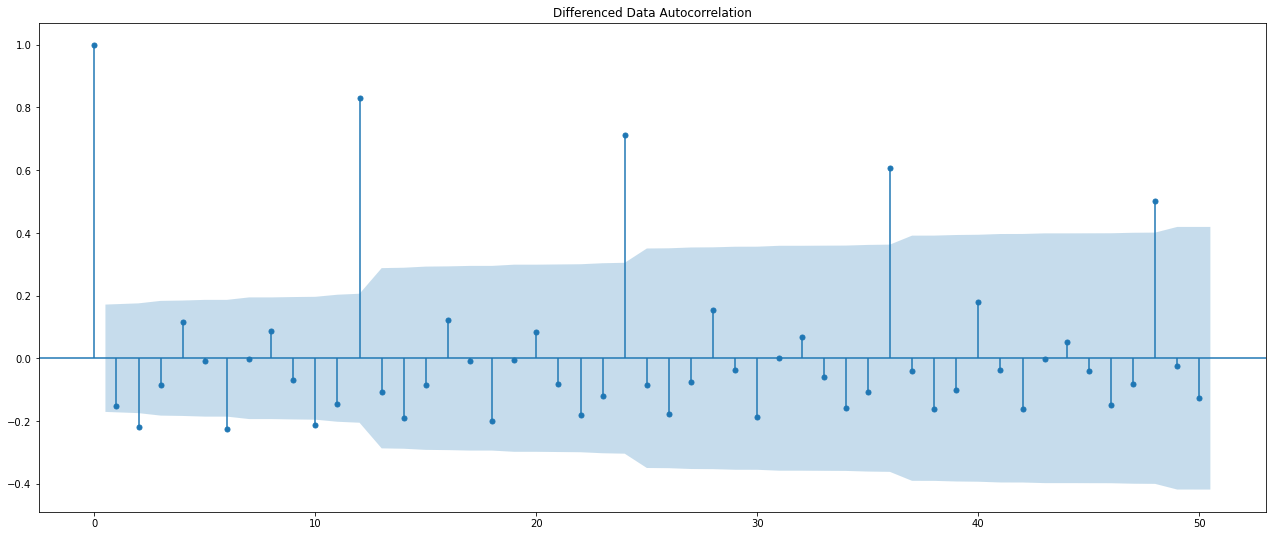

In [352]:
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation', method='ywmle')
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')

plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

Here, we have taken alpha=0.05.

We are going to take the seasonal period as F = 12.
We will keep the p(3) and q(2) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P', In PACF plot there is no significant pattern of cycle observed such that after the significant point of the cycle there is a cuts off. Therefore P = 0. 
* From the ADF test it is clear that at d=1 the series is stationary, Hence NO seasonal differencing is required D=0.
* The Moving-Average parameter in an SARIMA model is 'Q', In ACF plot for every seasonal pattern of 12, there is a cutoff therefore the value of Q = 12.

Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period). Therefore giving Q= 1 & F=12

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0, but considering to be very close.


In [353]:
import statsmodels.api as sm

Manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3,1,2),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_Manual_SARIMA_12 = Manual_SARIMA_12.fit(maxiter=1000)
print(results_Manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(0, 0, [1], 12)   Log Likelihood                -936.890
Date:                              Sun, 13 Nov 2022   AIC                           1887.780
Time:                                      18:14:54   BIC                           1907.056
Sample:                                           0   HQIC                          1895.605
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4893      0.112     -4.355      0.000      -0.709      -0.269
ar.L2          0.26

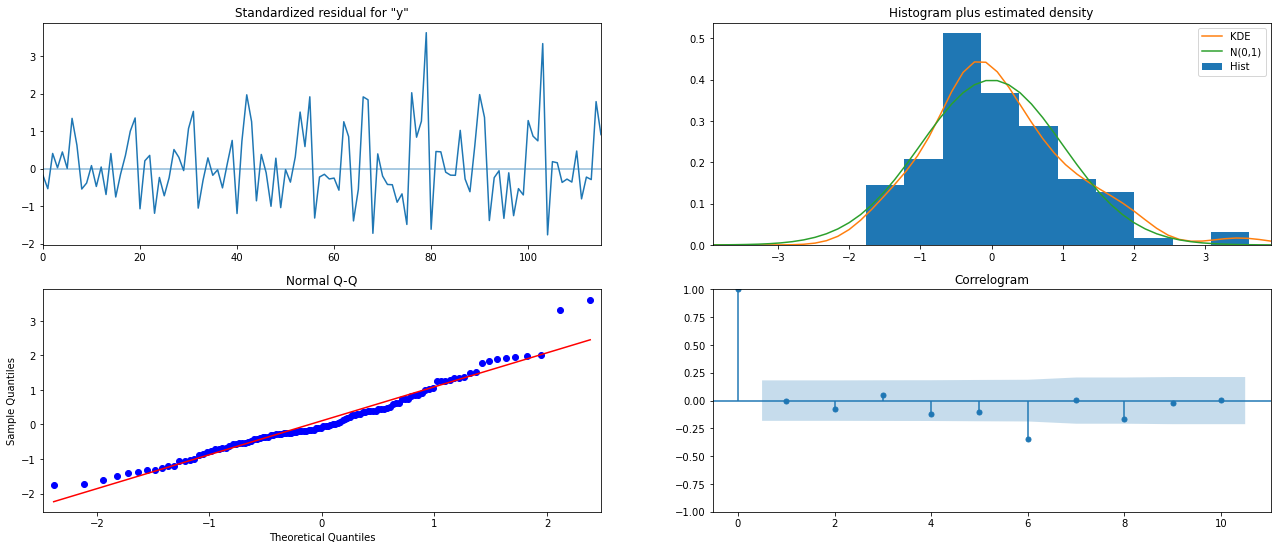

In [354]:
results_Manual_SARIMA_12.plot_diagnostics()
plt.show()

In [355]:
predicted_Manual_SARIMA_12 = results_Manual_SARIMA_12.forecast(steps=len(test))
predicted_Manual_SARIMA_12

array([2574.46911529, 2004.80317233, 2036.42623409, 2379.43058944,
       2104.7212101 , 2322.89645908, 2490.52803865, 2270.21629838,
       1972.47279291, 2307.38814361, 3276.34455827, 3654.77177942,
       2635.35219892, 2489.67375337, 2201.38674043, 2546.53614373,
       2336.12012678, 2598.92660927, 2332.57343262, 2582.44713143,
       2327.23037587, 2581.54877435, 2330.17932782, 2581.14002777,
       2331.37272399, 2579.74625264, 2332.46743294, 2578.55815645,
       2333.66984555, 2577.39522523, 2334.8394696 , 2576.22935702,
       2335.99587338, 2575.07698402, 2337.14287829, 2573.93592361,
       2338.27865179, 2572.80558594, 2339.40351744, 2571.68609289,
       2340.51764153, 2570.57731831, 2341.62110074, 2569.47915176,
       2342.71399939, 2568.39149476, 2343.79643954, 2567.3142465 ,
       2344.86852092, 2566.24730726, 2345.93034268, 2565.19057841,
       2346.98200303, 2564.14396225, 2348.0235992 ])

In [357]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_Manual_SARIMA_12,squared=False)
print(rmse)

1193.237102457541


In [358]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual_SARIMA(3, 1, 2)(0, 0, 1, 12)'])

resultsDf = pd.concat([resultsDf, resultsDf_13])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.05,SimpleExponentialSmoothing               1316.135411
Alpha=0.02,SimpleExponentialSmoothing-Brute_Force   1279.495201
Alpha=0.069,beta = 0, DoubleExponentialSmoothing    2007.238526
Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing...  1275.105310
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...   469.659106
Alpha=0.06,Beta=0.03,Gamma=0.26,TripleExponenti...   301.750190
Automated_ARIMA(2,1,2)                              1374.082299
Automated_SARIMA(1, 1, 2)(1, 0, 0, 12)               323.585667
manual_ARIMA(3, 1, 2)                               1379.232013
Manual_SARIMA(3, 1, 2)(0, 0, 1, 12)                 1193.237102

In [359]:
Manual_sarima_test_12 = test.copy() 
Manual_sarima_test_12['predict'] = predicted_Manual_SARIMA_12
Manual_sarima_test_12.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2574.469115
1991-02-28       2049  2004.803172
1991-03-31       1874  2036.426234
1991-04-30       1279  2379.430589
1991-05-31       1432  2104.721210

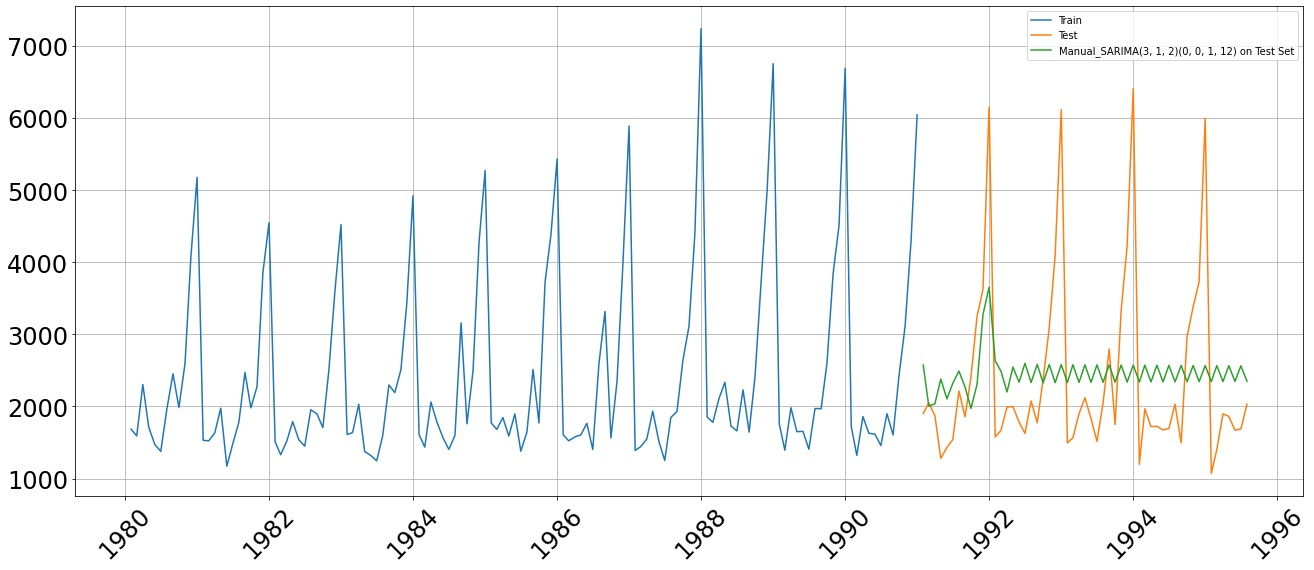

In [360]:
## Plotting on both the Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

#plt.plot(SES_train['predict',0.02], label='Alpha =0.05 Simple Exponential Smoothing predictions on Train Set')

plt.plot(Manual_sarima_test_12['predict'], label='Manual_SARIMA(3, 1, 2)(0, 0, 1, 12) on Test Set')

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid();

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [361]:
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.05,SimpleExponentialSmoothing               1316.135411
Alpha=0.02,SimpleExponentialSmoothing-Brute_Force   1279.495201
Alpha=0.069,beta = 0, DoubleExponentialSmoothing    2007.238526
Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing...  1275.105310
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...   469.659106
Alpha=0.06,Beta=0.03,Gamma=0.26,TripleExponenti...   301.750190
Automated_ARIMA(2,1,2)                              1374.082299
Automated_SARIMA(1, 1, 2)(1, 0, 0, 12)               323.585667
manual_ARIMA(3, 1, 2)                               1379.232013
Manual_SARIMA(3, 1, 2)(0, 0, 1, 12)                 1193.237102

In [362]:
resultsDf.sort_values('Test RMSE', ascending = True)

Test RMSE
Alpha=0.06,Beta=0.03,Gamma=0.26,TripleExponenti...   301.750190
Automated_SARIMA(1, 1, 2)(1, 0, 0, 12)               323.585667
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...   469.659106
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Manual_SARIMA(3, 1, 2)(0, 0, 1, 12)                 1193.237102
SimpleAverageModel                                  1275.081804
Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing...  1275.105310
Alpha=0.02,SimpleExponentialSmoothing-Brute_Force   1279.495201
6pointTrailingMovingAverage                         1283.927428
Alpha=0.05,SimpleExponentialSmoothing               1316.135411
9pointTrailingMovingAverage                         1346.278315
Automated_ARIMA(2,1,2)                              1374.082299
manual_ARIMA(3, 1, 2)                               1379.232013
RegressionOnTime                                    1389.135175
Alpha=0.069,beta = 0, DoubleExponentialSmoothing    2007.238526
NaiveModel                                          3864.279352

From the above table it is clear that Brute Force Triple exponential performed the best and very close Automated SARIMA

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

The Model that has least rmse score are
* Triple Exponential Smoothing Brute Force Method
* Automated Sarima

### Triple Exponential Smoothing Brute Force Method.............12months future plot

In [363]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.06,
                                                                 smoothing_trend=0.03,
                                                                 smoothing_seasonal=0.26)

In [364]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE of full dataset:',RMSE_fullmodel1)

RMSE of full dataset: 357.1893706893467


In [365]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

In [366]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-31  1259.773218  1961.323787  2662.874356
1995-09-30  1661.710336  2363.260905  3064.811474
1995-10-31  2509.644499  3211.195068  3912.745637
1995-11-30  3275.804633  3977.355202  4678.905772
1995-12-31  5355.540788  6057.091357  6758.641926

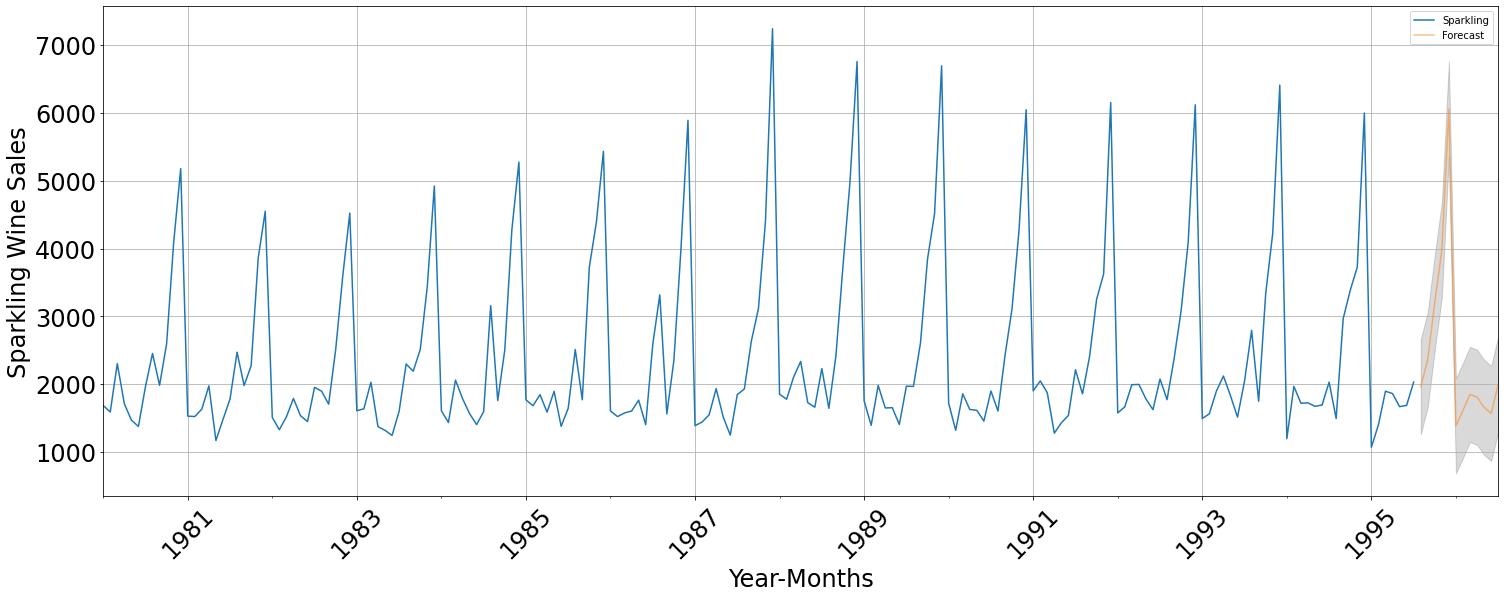

In [367]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(25,9))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months',fontsize=24)
axis.set_ylabel('Sparkling Wine Sales',fontsize=24)

plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=24, rotation=0)

plt.legend(loc='best')
plt.grid()
plt.show()

### Automated SARIMA.............12months future plot

In [368]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, [], 12)   Log Likelihood               -1291.186
Date:                             Sun, 13 Nov 2022   AIC                           2592.373
Time:                                     18:40:06   BIC                           2608.139
Sample:                                 01-31-1980   HQIC                          2598.769
                                      - 07-31-1995                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6715      0.172     -3.893      0.000      -1.010      -0.333
ma.L1         -0.2156      

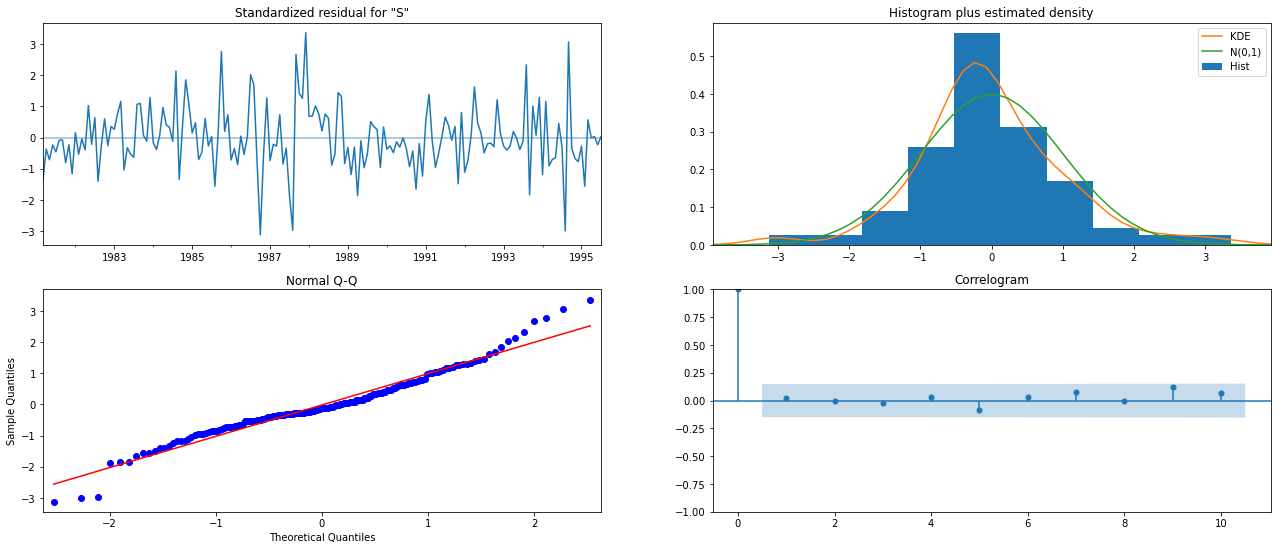

In [369]:
results_full_data_model.plot_diagnostics();

In [371]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [376]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1578.127240  414.655098     765.418182    2390.836299
1995-09-30  2935.743696  417.555126    2117.350687    3754.136704
1995-10-31  3366.023858  418.541017    2545.698538    4186.349178
1995-11-30  3672.617741  419.196070    2851.008541    4494.226942
1995-12-31  5853.549717  419.349285    5031.640223    6675.459212

In [377]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).tail()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1996-03-31  1931.204869  419.571135    1108.860556    2753.549182
1996-04-30  1900.764582  419.563728    1078.434786    2723.094378
1996-05-31  1715.541833  419.579733     893.180669    2537.902997
1996-06-30  1734.055334  419.573960     911.705484    2556.405184
1996-07-31  2060.498764  419.580078    1238.136922    2882.860606

In [378]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 565.4012407804635


In [379]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

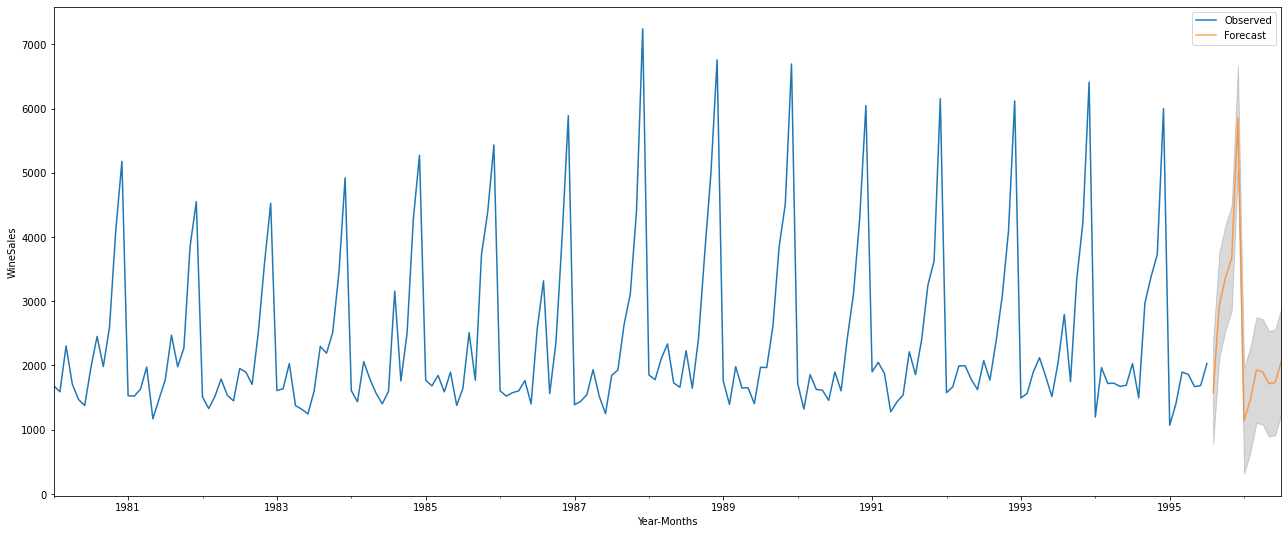

In [380]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('WineSales')
plt.legend(loc='best')
plt.show()